# In vehicle coupon recommendation 
The purpose of this project is to predict 1) if a customer will accept the coupon or not under machine learning algorithms with best tuned parameters, and 2) mining the circumstances under which people are more likely to accept the coupons throung explornatory data analysis. 

## Table of contents
- [0 - Packages](#0) 
- [1 - Data Processing](#1)
  - [1.1 - Know your data](#1-1)
    - [1.1.1 - Show the first 5 records](#1-1-1)
    - [1.1.2 - Dimension](#1-1-2)
    - [1.1.3 - Fetures explanations](#1-1-3)
    - [1.1.4 - Feature statistics](#1-1-4)
    - [1.1.5 - Null or not](#1-1-5)
  - [1.2 - Data cleaning and transformation](#1-2)
    - [1.2.1 - Set data type to category](#1-2-1)
    - [1.2.2 - Drop car columns](#1-2-2)
    - [1.2.3 - Impute lack data](#1-2-3)
  - [1.3 - Summary](1-3)
- [2 - Exploratory Data Analysis](#2) 
  - [2.1 - Comparsion between coupon acception and rejection](#2.1)
  - [2.2 - Which features are indepedent with the target?](#2.2)
  - [2.3 - How do the rest of features influence the target?](#2.3)
  - [2.4 - Summary](2-4)
- [3 - Feature Enigineering](#3)
  - [3.1 - Feature selection](#3-1)
  - [3.2 - Feature encoding](#3-2)
    - [3.2.1 - Ordinal encoding](#3-2-1)
    - [3.2.2 - One hot encoding](#3-2-2)
    - [3.2.3 - Target encoding](#3-2-3)
    - [3.2.4 - Embedded encoding](#3-2-4)
    - [3.2.5 - Our encoding choice](#3-2-5)
  - [3.3 - Summary](#3-3)
- [4 - Classification Models](#4)
  - [4.1 - Logistic regression](#4-1)
  - [4.2 - Neural Network](#4.2)
    - [4.2.1 - Just one layer, baseline](#4-2-1)
    - [4.2.2 - Add hidden layers](#4-2-2)
    - [4.2.3 - Dropout](#4-2-3)
    - [4.2.4 - Optimizers](#4-2-4)
    - [4.2.5 - Number of epoches](#4-2-5)
    - [4.2.6 - Number of batch size](#4-2-6)
    - [4.2.7 - Learning rate](#4-2-7)
    - [4.2.8 - Number of Hidden neurons](#4-2-8)
    - [4.2.9 - Regularization](#4-2-9) 
  - [4.3 - Support Vector Machine(SVM)](#4.3)
    - [4.3.1 - Hard-Margin SVM](#4-3-1)
    - [4.3.2 - Soft-Margin SVM](#4-3-2)
  - [4.4 - Summary](#4-4)
- [5 - Clustering](#5)

<a name='0'></a>
## 0 - Load Package
Here are all packages that will be used in this notebook. We are telling the story on the shoulder of gaints, resp. 

In [ ]:
!pip install category_encoders
!pip install dmba

# Utils 
import warnings
warnings.filterwarnings('ignore')
import os 
from google.colab import files
from pandas import read_csv

# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA & Data processing
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import category_encoders as ce 
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

# Logistic Regression
from tqdm import tqdm


# Neuron Network
import tensorflow as tf
from tensorflow import keras

# Measure metric
from sklearn.linear_model import LogisticRegression
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.metrics import accuracy_score

import random
from scipy.stats import norm
import time
import tracemalloc




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
no display found. Using non-interactive Agg backend


<a name='1'></a>
## 1 - Data Preprocessing
This chapter preprocesses the [in-vehicle coupon recommendation Data Set](https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation) from UCI Machine Learnign Repository. When it comes to a new data, knowing your data can help you with better decisions on how to clean or transform data, which makes the potential insights clear. What do we need to know? Here is the receipt, data dimension, exact meaning for columns, any null value inside, are there some outliers or inconsitent values. How can solve the problem? Would be some difference for numerical variables and categorical variables? 

<a name='1-1'></a>
### 1.1 - Know your data

<a name="1-1-1"></a>
#### 1.1.1 - Show the first 5 records
Just have a glimpse of your data to form the basic understanding.

- Access the data when using Google colab

In [ ]:
file = files.upload()
df = pd.read_csv('Vehicle_Coupon.csv')  # The data file can be accessed in Dat_Set folder
df.head()

Saving Vehicle_Coupon.csv to Vehicle_Coupon (1).csv


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


- Access the data when using the local data file 

In [ ]:
# df = pd.read_csv('/Users/anushkahegde/Desktop/NEU/IE_7374_Machine_Learning/ml_project/Data_Set/Vehicle_Coupon.csv') 
# df.head()

<a name='1-1-2'></a>
#### 1.1.2 -  Dimension
The original coupon recommendation dataset is composed with 12684 records and 26 columns.

In [ ]:
df.shape

(12684, 26)

<a name='1-1-3'></a>
#### 1.1.3 - Features Explanations
Among 26 columns, 25 of them are features which may affect the acception/rejection of the coupun that are represented as 1/0 in target column. All should be categorical variables as the physical meaning. The features can be roughly categorized into 3 parts, passenger info, coupon info, and driving info. For passenge info, it can be gender, age, maritalStatus, has_child, education, occupation, income (7). For coupon info, they are coupon, expiration, Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 (7). For driving info, destination, passanger, weather, time, car, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp (10).

In [ ]:
for f in df.columns:
  print(f, df[f].unique(), '\n')

destination ['No Urgent Place' 'Home' 'Work'] 

passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 

weather ['Sunny' 'Rainy' 'Snowy'] 

temperature [55 80 30] 

time ['2PM' '10AM' '6PM' '7AM' '10PM'] 

coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)'] 

expiration ['1d' '2h'] 

gender ['Female' 'Male'] 

age ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 

maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 

has_children [1 0] 

education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'] 

occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Commu

<a name="1-1-4"></a>
#### 1.1.4 -  Features Statistics
From above, we understand that the meaning for all columns. In this part, we explore the their data type and quantity to see if whether it meet our expectation for all categorical variables or dectect the outliners. The insights are 1) some of them are int type, so we may need to tranform the data type to category type that can be seen in section 1.2.1. 2) no outliners are detected in the group statistics, thus ensuring the consientency of the data for further analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<a name='1-1-5'></a>
#### 1.1.5 - Null or not
99.15 percent of values in car column is null, and ~1 percent of values in Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 are missing. As a measure, we plans to drop the car column (section 1.2.2) and impute other nan value in the abovementioned columns, as is implementated in section 1.2.3. 

In [ ]:
df.isnull().sum() / df.shape[0] * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

<a name='1-2'></a>
### 1.2 - Data cleaning and transformation
From the observations from section 1.1 know your data, we set data type to catergory to avoid some unexpected int encoding, drop the car column for its nearly 90% null value and impute the rest lack data using the most frequent category that happens in that feature. What I want to note is that this part can prepare for exploratory data analysis but not for the models. For latter purpose, we have a separate chapter, 3. Feature Engineering, to acheive.

<a name='1-2-1'></a>
#### 1.2.1 -  Set data type as category

In [ ]:
df = df.astype('category')
df.dtypes

destination             category
passanger               category
weather                 category
temperature             category
time                    category
coupon                  category
expiration              category
gender                  category
age                     category
maritalStatus           category
has_children            category
education               category
occupation              category
income                  category
car                     category
Bar                     category
CoffeeHouse             category
CarryAway               category
RestaurantLessThan20    category
Restaurant20To50        category
toCoupon_GEQ5min        category
toCoupon_GEQ15min       category
toCoupon_GEQ25min       category
direction_same          category
direction_opp           category
Y                       category
dtype: object

<a name='1-2-2'></a>
#### 1.2.2 - Drop car column

In [ ]:
df.drop(columns='car', inplace=True)
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

<a name='1-2-3'></a>
#### 1.2.3 - Impute lack data

[Ref](https://jamesrledoux.com/code/imputation#:~:text=One%20approach%20to%20imputing%20categorical,given%20in%20Pandas'%20value_counts%20function.)

In [ ]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.isnull().sum().sum()

0

### 1.3 - Summary
We start with how the data looks like, its dimension, features meaning, features statistics to see if there are abnormal values based on domain knowldege, and check null values for potential drop or imputation. Then, we switch to data cleaning and transformation with respect to the insights from last step. Because, our data are catergorical, so we check the its consistency by looking unique values for all features in feature statistics. If there is numerical data, scatter plot for all features and target would be a wise option to detect the outliners.

<a name='2'></a>
## 2 - Exploratory Data Analysis
This chapter mine the relationship between influential factors on coupons acception. At first, we compare the coupon acception and rejection rate for 
the acquaintance of current advertising situation and the significance of a recommendation system with a high accuracy. Then, we ask which features may influene the coupons acception? And how do they impact? After all explaration, we will know the answer of those questions.

<a name='2-1'></a>
### 2.1 - Comparison between coupon acception and rejection

The accept number is 7210 and reject one is 5474. It can be roughly regarded as balance data set. Then we draw a bar chart and pie to represent the number and ratio. 

- Create a combination graph with left bar chart to show the number, and right pie chart to show the ratio.

In [ ]:
accept_num = (df.Y == 1).sum() 
reject_num = (df.Y == 0).sum() 
accept_rate = (df.Y == 1).sum() / df.shape[0]
reject_rate = 1 - accept_rate
print("The accept number is %i, and the reject number is %i, with rates %.2f, %.2f \
respectively " %(accept_num, reject_num, accept_rate, reject_rate))

The accept number is 7210, and the reject number is 5474, with rates 0.57, 0.43 respectively 


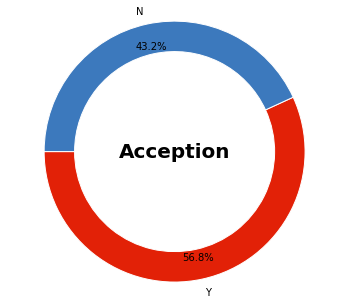

In [ ]:
def make_pie(sizes, text,colors,labels):
    import matplotlib.pyplot as plt
    import numpy as np

    col = [[i/255. for i in c] for c in colors]

    fig, ax = plt.subplots()
    ax.axis('equal')
    width = 0.35
    kwargs = dict(colors=col, startangle=180, autopct='%1.1f%%')
    outside, _, _ = ax.pie(sizes, radius=1.5, pctdistance=1-width/2,
                       labels=labels,**kwargs)
    plt.setp( outside, width=width, edgecolor='white')

    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    plt.show()

c1 = (226,33,7)
c2 = (60,121,189)

make_pie([7210,5474], "Acception",[c1,c2],['Y','N'])



<a name='2-2'></a>
### 2.2 -  Which features will be indepedent of target?
We conduct Chi-square test and plot p values using heatmap to verify the independence between features and target. From the bottom line of the heatmap, we can tell the p values between toCoupon_GET5min, destination_same, destination_opp and Y target are 1, 0.1, 0.1. If our alpha limit set as 0.05, that means if the p-value is below 0.05, we will consider the feature and target variable to be dependent whereas for a p-value above 0.05, the variables are independent of one another. This provides the reference for feature selection.
[Ref](https://medium.com/analytics-vidhya/constructing-heat-map-for-chi-square-test-of-independence-6d78aa2b140f#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjFiZDY4NWY1ZThmYzYyZDc1ODcwNWMxZWIwZThhNzUyNGM0NzU5NzUiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NTc1NzcwNTcsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExNjk2NjQyODk4MDIxNTU1MjE0OSIsImVtYWlsIjoieWFubWluZ2xpdTIxQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJuYW1lIjoiWWFubWluZyBMaXUiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUl0YnZtbW1DdnlEVzktaWF0dXQzYXhlQWFlZGpIWV9TY2laNWI4M3dfLTY9czk2LWMiLCJnaXZlbl9uYW1lIjoiWWFubWluZyIsImZhbWlseV9uYW1lIjoiTGl1IiwiaWF0IjoxNjU3NTc3MzU3LCJleHAiOjE2NTc1ODA5NTcsImp0aSI6IjhmMmJjM2MwOTk2NDZmMDdiODBhYTZmNWE5OGY5ZGU0YTk3YzAxMTQifQ.Tvz3S-XbT029APxcmsPETDBUj8S1ir0iYejfv9QbpWLtuCDYwxxbDuQv1FCL9Wz_D8hmxPutvuOgrF-dFT5oMYTq6rn0hV8Z0UNNn8rBR_KofiuSx10ChpZgJfmMAtqccsfW20Yk__v_xvZPNOLnjiHdXZAtoQiWUNo9VFAZ58NM98KjLfkkJ0r715iuIQrnyzWnUnabgwO96GT1OTaLynipdg6ugvClNENa3WZIncBtdqlP4jeTE7QOEPnTMRUntHGCTj5VRsnJRYt3OYpE6BqQgANptFUygI-K47IM5WSAicSFzmxyp9CgJxQ3U4d4S3LPKqiBy63v7gkxkLJPhQ)

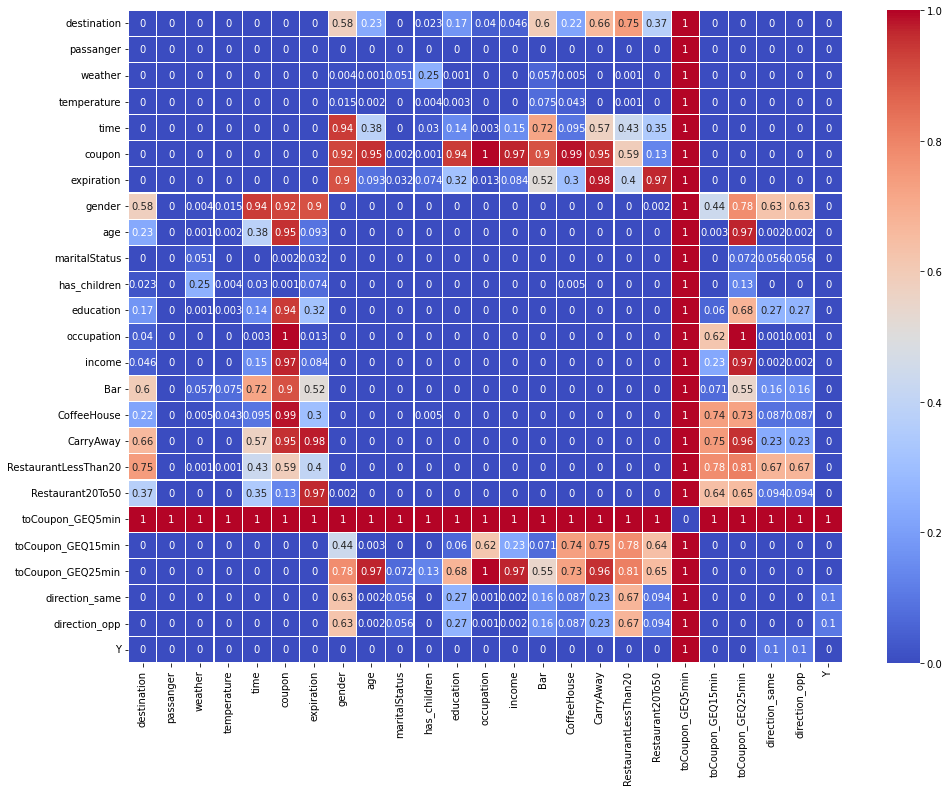

In [ ]:
df = df.astype('object')
column_names=df.columns

chisqmatrix=pd.DataFrame(df,columns=column_names,index=column_names)


outercnt=0
innercnt=0
for icol in column_names:
    for jcol in column_names:
       mycrosstab=pd.crosstab(df[icol],df[jcol])
       stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
       chisqmatrix.iloc[outercnt,innercnt]=round(p,3)
       cntexpected=expected[expected<5].size
       perexpected=((expected.size-cntexpected)/expected.size)*100
       if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=2
       if icol==jcol:
           chisqmatrix.iloc[outercnt,innercnt]=0.00
       innercnt=innercnt+1
    outercnt=outercnt+1
    innercnt=0
    

plt.figure(figsize = (16,12))
sns.heatmap(chisqmatrix.astype(np.float64), annot=True,linewidths=0.1, 
            cmap='coolwarm')

# Question: 2 perspectives here. If we see the bottom row of this heatmap, 
# we can easily remove those with bigger p values with alpha = .05 for they 
# are indepdent. How do we deal those variables among features for a relatie
# small value?

<a name='2-3'></a>
### 2.3 - How do the rest of features will influence the target ?


[Ref](https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib)

From the bar charts below, we can observe that the acceptance of coupons increases when drivers are not actively pursuing a destination. They also prefer to purchase coupons when in casual group settings without the responsibility of kids or when on their own. According to the temperature and weather features, sunny and warm conditions are preferred for dining out with comparatively higher acceptation rates at breakfast (10AM), lunch (2PM) and dinner (6PM) hours. The types of discounts primarily sought include Carry out/ takeaway coupons and Restaurants for less than $20 with suffient time before expiration. The customers that opt for coupons typically comprise students and singles among the low income bracket who can gain considerable savings on their daily coffee or meals. 

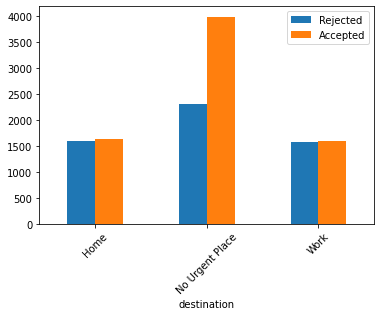

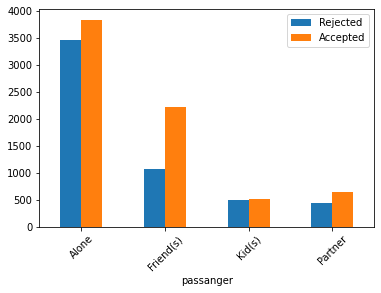

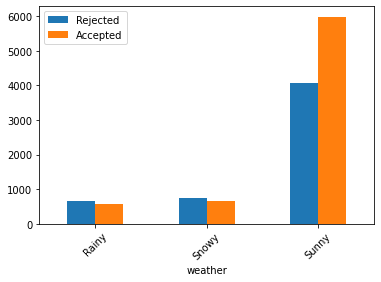

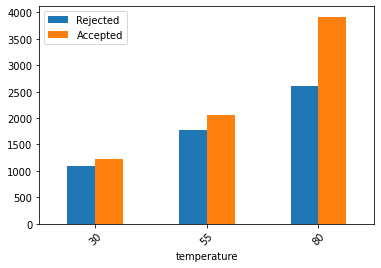

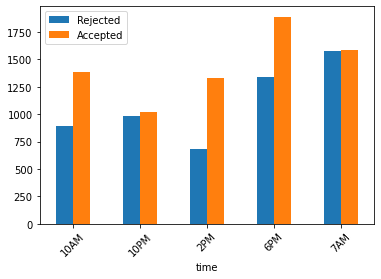

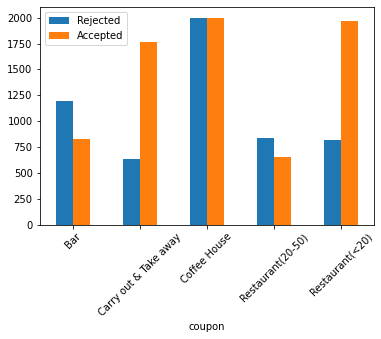

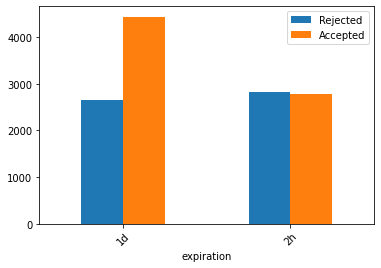

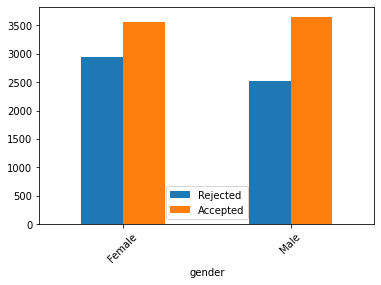

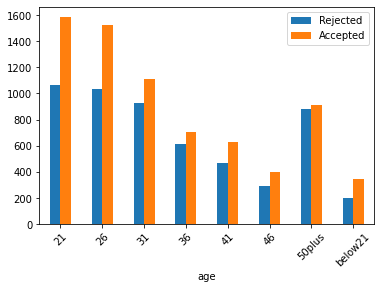

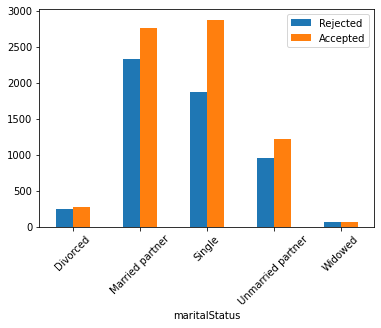

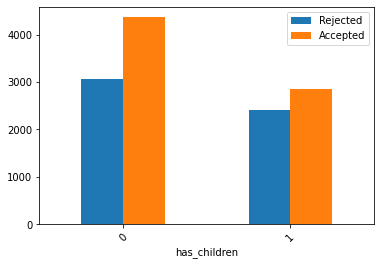

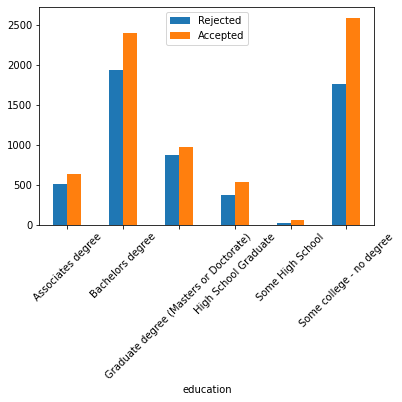

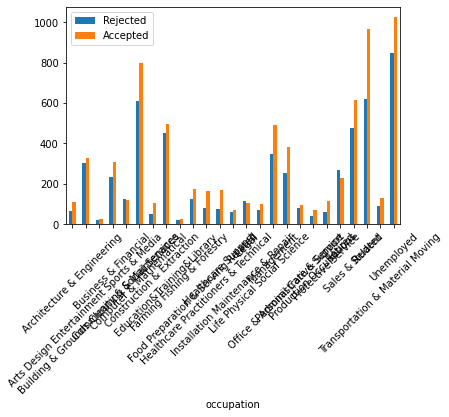

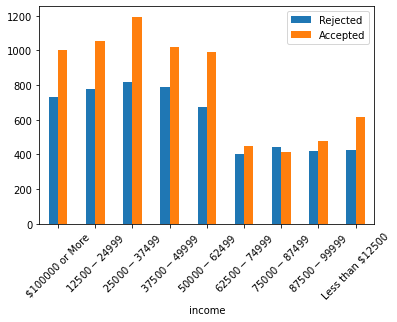

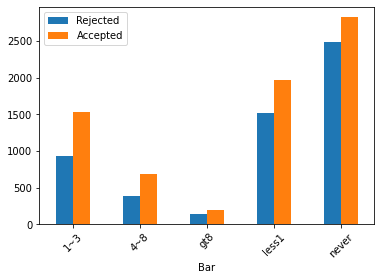

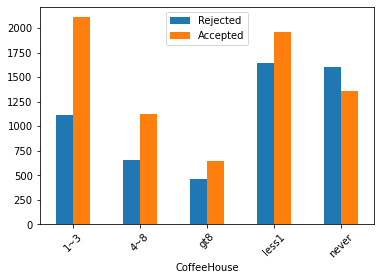

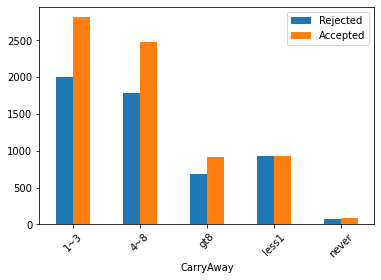

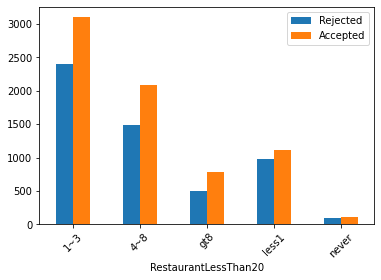

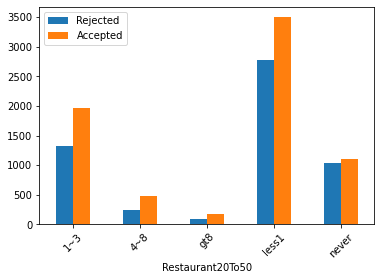

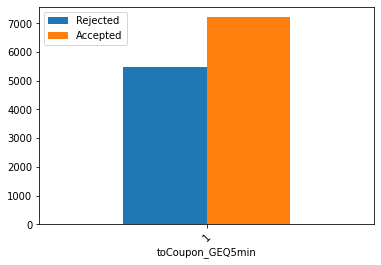

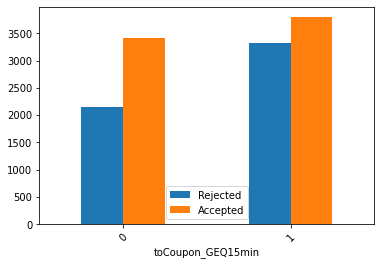

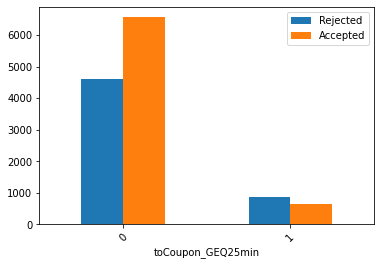

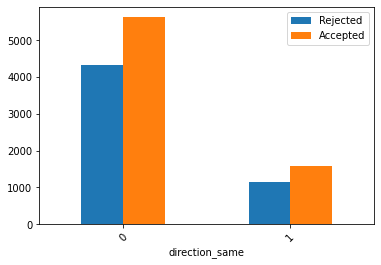

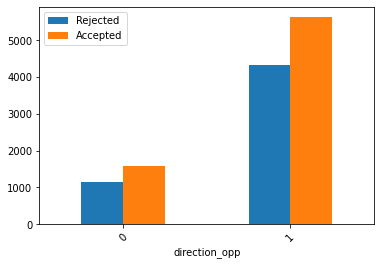

In [ ]:
%matplotlib inline
count = 0
target = df.columns[-1]
for cat_val in df.columns:
  if cat_val == target: 
    continue
  temp_df = df.loc[:, [cat_val, target]]  
  temp_df = temp_df.groupby([cat_val, target]).size().reset_index(name='count')
  pivot_df = pd.pivot_table(temp_df, values='count', index=cat_val, columns=target)
  pivot_df.plot(kind='bar', rot=45)
  plt.legend(['Rejected','Accepted'])
  count += 1

<a name='3'></a>
## 3 - Feature Engineering
This chapter consists of feature selection and encoding for application to the models. It should answer the following quesitons, 1) what is the standard for feature selection? 2) which encoding style is the best for our coupon data?

<a name='3-1'></a>
### 3.1 -  Feature selection
We assume that the target and features are related only the confidence is above 95 percent. By observing the bottom row in the heatmap in section 2.2, those 3 columns, **toCoupon_GEQ5min, direction_same, direction_opp**, are removed as not meeting the confidence conditions.

In [ ]:
df_droped = df.drop(columns = ['toCoupon_GEQ5min', 'direction_same', 'direction_opp'])
print(len(df.columns))
print(len(df_droped.columns))
# df_droped.to_csv('Data_Dropped.csv')

25
22


<a name=3-2></a>
### 3.2 - Feature encoding
For our catergorical variables, we attempted one hot encoding, oridinal encoding without mapping of orders, ordinal encoding with mapping of orders, target encoding and CatBoost encoder. Before testing the models, the dataset was cleaned and transformed by splitting the dataframe into train data, validation data, and test data with a ratio 6/2/2 as per the recommendations of Andrew Ng’s online machine learning course.

[Encoding categorical variables](https://kiwidamien.github.io/encoding-categorical-variables.html)

In [ ]:
target = ['Y']
XP = df_droped.drop(columns = target)
yP = df_droped[target]
XTrain, XTest, yTrain, yTest = train_test_split(XP, yP, test_size=0.2, random_state=0)
XTrain, XValid, yTrain, yValid = train_test_split(XTrain, yTrain, test_size=0.25, random_state=0)
print(XTrain.shape, XValid.shape, XTest.shape, yTrain.shape, yValid.shape, yTest.shape)

(7610, 21) (2537, 21) (2537, 21) (7610, 1) (2537, 1) (2537, 1)


<a name='3-2-1'></a>
#### 3.2.1 - Ordinal encoding
Ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels. Here, we tried two ways, package and manual implementation. The category_encoder package assigns values for categories in features randomly while our manual implementation maps the relationships between categories and integer values based on prior knowledge. Furthermore, we can apply oridinal encoding to all features or some features, like age, education, income, Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50. 

In [ ]:
# Ordinal encoding using category_encoder package with random integer asssignment
def ordinal_encoder(train, valid, test, columns):
    oe = ce.OrdinalEncoder(cols=columns, return_df=True)
    train_transformed = oe.fit_transform(train)
    valid_transformed = oe.transform(valid)
    test_transformed = oe.transform(test)
    return train_transformed, valid_transformed, test_transformed


# Ordinal encoding manually with specific integer assigment for categories based
# on domain knowledge
def ordinal_encoding(df):
    clean_df = df.copy()
    frequency_map = {
        'never': 0,
        'less1': 1,
        '1~3': 2,
        '4~8': 3,
        'gt8': 4
    }
    
    age_map = {
        'below21': 0,
        '21': 1,
        '26': 2,
        '31': 3,
        '36': 4,
        '41': 5,
        '46': 6,
        '50plus': 7
    }
    
    income_map = {
        'Less than $12500': 0,
        '$12500 - $24999': 1,
        '$25000 - $37499': 2,
        '$37500 - $49999': 3,
        '$50000 - $62499': 4,
        '$62500 - $74999': 5,
        '$75000 - $87499': 6,
        '$87500 - $99999': 7,
        '$100000 or More': 8
    }
    
    frequency_cols = ['Restaurant20To50', 'RestaurantLessThan20',
                      'CarryAway', 'CoffeeHouse', 'Bar']

    
    education_map = {
        'Some High School': 0, 
        'High School Graduate': 1,
        'Some college - no degree': 2,
        'Associates degree': 3,
        'Bachelors degree': 4,
        'Graduate degree (Masters or Doctorate)': 5
    }
        
    
    for col in frequency_cols:
        clean_df[col] = clean_df[col].map(frequency_map)
    clean_df.age = clean_df.age.map(age_map)
    clean_df.income = clean_df.income.map(income_map)
    clean_df.education = clean_df.education.map(education_map)

    return clean_df

In [ ]:
# Test purpose, you can skip this part
print(df_droped.columns)
ordial_columns = ['age', 'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
XTrain_some_ordinal, XValid_some_ordinal, XTest_some_ordinal = ordinal_encoder(XTrain, XValid, XTest, ordial_columns)
display(XTrain_some_ordinal.head())
display(XValid_some_ordinal.head())
display(XTest_some_ordinal.head())
# Question: Are time, temprature the ordinal variables?

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'Y'],
      dtype='object')


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
9863,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,1,Single,...,1,Office & Administrative Support,1,1,1,1,1,1,1,0
251,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,2,Single,...,2,Unemployed,2,2,1,2,2,1,1,0
4949,Home,Alone,Sunny,55,10PM,Carry out & Take away,1d,Male,3,Single,...,2,Production Occupations,1,2,1,2,2,1,1,1
9411,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Female,4,Divorced,...,1,Unemployed,3,3,1,2,2,1,0,0
6449,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,5,Single,...,1,Office & Administrative Support,3,2,1,3,2,2,0,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
6660,Home,Partner,Sunny,55,10PM,Bar,1d,Male,5,Unmarried partner,...,1,Transportation & Material Moving,7,2,3,3,4,1,0,0
10645,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,2,Unmarried partner,...,1,Student,2,1,2,2,4,2,0,0
2127,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Female,2,Single,...,1,Life Physical Social Science,2,1,2,2,5,1,0,0
6536,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,6,Single,...,1,Student,2,2,3,3,5,3,0,0
330,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Female,2,Unmarried partner,...,5,Student,4,3,4,3,2,1,0,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
12370,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,5,Single,...,3,Unemployed,7,2,4,2,2,1,0,0
8332,No Urgent Place,Kid(s),Sunny,55,2PM,Coffee House,1d,Female,7,Married partner,...,4,Computer & Mathematical,4,1,3,4,2,1,1,0
8917,No Urgent Place,Friend(s),Rainy,55,10PM,Restaurant(20-50),2h,Male,1,Single,...,4,Unemployed,2,3,4,1,4,1,1,0
6057,Home,Alone,Sunny,55,10PM,Carry out & Take away,1d,Female,5,Single,...,2,Unemployed,2,1,4,2,2,4,1,1
10644,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,2,Unmarried partner,...,1,Student,2,1,2,2,4,2,1,0


<a name = '3-2-2'></a>
#### 3.2.2 - One hot encoding
A one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0) [Ref](https://en.wikipedia.org/wiki/One-hot). It usually used for transforming categorical variables into values, which can be suitable for machine learning models. Several ways can implement this encoding style, like get_dummies, OneHotEncoder from category_encoder and sklearn.preprocessing package.

In [ ]:
def one_hot_encoding(train, valid, test, columns):
    oe = ce.OneHotEncoder(cols=columns, return_df=True)
    train_transformed = oe.fit_transform(train)
    valid_transfromed = oe.transform(valid)
    test_transformed = oe.transform(test)
    return train_transformed, valid_transfromed, test_transformed

In [ ]:
# Test
XTrain_some_one_hot, XValid_some_one_hot, XTest_some_one_hot = one_hot_encoding(XTrain, XValid, XTest, columns=[i for i in XTrain.columns if i not in ordial_columns])
display(XTrain_some_one_hot.head())
display(XValid_some_one_hot.head())
display(XTest_some_one_hot.head())

,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
9863,1,0,0,1,0,0,0,1,0,0,...,$25000 - $37499,less1,never,less1,less1,less1,1,0,1,0
251,0,1,0,1,0,0,0,0,1,0,...,Less than $12500,1~3,never,4~8,1~3,less1,1,0,1,0
4949,0,1,0,1,0,0,0,0,1,0,...,$25000 - $37499,1~3,never,4~8,1~3,less1,1,0,0,1
9411,1,0,0,1,0,0,0,0,1,0,...,$37500 - $49999,never,never,4~8,1~3,less1,0,1,1,0
6449,0,0,1,1,0,0,0,0,1,0,...,$37500 - $49999,1~3,never,1~3,1~3,1~3,0,1,1,0


,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
6660,0,1,0,0,0,1,0,0,1,0,...,$12500 - $24999,1~3,4~8,1~3,4~8,less1,0,1,1,0
10645,1,0,0,1,0,0,0,0,0,1,...,Less than $12500,less1,1~3,4~8,4~8,1~3,0,1,1,0
2127,1,0,0,0,1,0,0,0,1,0,...,Less than $12500,less1,1~3,4~8,gt8,less1,0,1,1,0
6536,0,0,1,1,0,0,0,0,1,0,...,Less than $12500,1~3,4~8,1~3,gt8,4~8,0,1,1,0
330,1,0,0,0,0,1,0,0,1,0,...,$75000 - $87499,never,less1,1~3,1~3,less1,0,1,1,0


,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
12370,1,0,0,0,1,0,0,0,1,0,...,$12500 - $24999,1~3,less1,4~8,1~3,less1,0,1,1,0
8332,1,0,0,0,0,0,1,0,1,0,...,$75000 - $87499,less1,4~8,gt8,1~3,less1,1,0,1,0
8917,1,0,0,0,1,0,0,1,0,0,...,Less than $12500,never,less1,less1,4~8,less1,1,0,1,0
6057,0,1,0,1,0,0,0,0,1,0,...,Less than $12500,less1,less1,4~8,1~3,never,1,0,0,1
10644,1,0,0,1,0,0,0,1,0,0,...,Less than $12500,less1,1~3,4~8,4~8,1~3,1,0,1,0


<a name='3-2-3'></a>
#### 3.2.3 - Mixture encoding 
Mixture encoding is our diy name for the combination of one hot encoding and ordinal encoding. We implement those encoding with ordinal encoding with random value assignments for categories and ordinal encoding with some order value assignment for categories. 

In [ ]:
# One Hot Encoding + Ordianal Encoding with random value assignments for categories
# yTrain, yTest, yValid= yTrain.astype('int'), yTest.astype('int'), yValid.asType('int')

ordial_columns = ['age', 'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
XTrain_some_ordinal_random, XValid_some_ordinal_random, XTest_some_ordinal_random = ordinal_encoder(XTrain, XValid, XTest, ordial_columns)
# display(XTrain_some_ordinal_random.head())
# display(XValid_some_ordinal_random.head())
# display(XTest_some_ordinal_random.head())


XTrain_mixture_random, XValid_mixture_random, XTest_mixture_random = one_hot_encoding(XTrain_some_ordinal_random, XValid_some_ordinal_random, XTest_some_ordinal_random, columns=[i for i in XTrain.columns if i not in ordial_columns])
# display(XTrain_mixture_random.head())
# display(XValid_mixture_random.head())
# display(XTest_mixture_random.head())

## Ordinal encoding with some order value assignment for categories 
yTrain, yValid, yTest = yTrain.astype('int'), yValid.astype('int'), yTest.astype('int')
XTrain_some_ordinal= ordinal_encoding(XTrain)
XValid_some_ordinal = ordinal_encoding(XValid)
XTest_some_ordinal = ordinal_encoding(XTest)

XTrain_mixture, XValid_mixture, XTest_mixture = one_hot_encoding(XTrain_some_ordinal, XValid_some_ordinal, XTest_some_ordinal, columns=[i for i in XTrain.columns if i not in ordial_columns])
display(XTrain_mixture.head())
display(XValid_mixture.head())
display(XTest_mixture.head())


display(XTrain.head())

,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
9863,1,0,0,1,0,0,0,1,0,0,...,2,1,0,1,1,1,1,0,1,0
251,0,1,0,1,0,0,0,0,1,0,...,0,2,0,3,2,1,1,0,1,0
4949,0,1,0,1,0,0,0,0,1,0,...,2,2,0,3,2,1,1,0,0,1
9411,1,0,0,1,0,0,0,0,1,0,...,3,0,0,3,2,1,0,1,1,0
6449,0,0,1,1,0,0,0,0,1,0,...,3,2,0,2,2,2,0,1,1,0


,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
6660,0,1,0,0,0,1,0,0,1,0,...,1,2,3,2,3,1,0,1,1,0
10645,1,0,0,1,0,0,0,0,0,1,...,0,1,2,3,3,2,0,1,1,0
2127,1,0,0,0,1,0,0,0,1,0,...,0,1,2,3,4,1,0,1,1,0
6536,0,0,1,1,0,0,0,0,1,0,...,0,2,3,2,4,3,0,1,1,0
330,1,0,0,0,0,1,0,0,1,0,...,6,0,1,2,2,1,0,1,1,0


,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
12370,1,0,0,0,1,0,0,0,1,0,...,1,2,1,3,2,1,0,1,1,0
8332,1,0,0,0,0,0,1,0,1,0,...,6,1,3,4,2,1,1,0,1,0
8917,1,0,0,0,1,0,0,1,0,0,...,0,0,1,1,3,1,1,0,1,0
6057,0,1,0,1,0,0,0,0,1,0,...,0,1,1,3,2,0,1,0,0,1
10644,1,0,0,1,0,0,0,1,0,0,...,0,1,2,3,3,2,1,0,1,0


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
9863,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,36,Single,...,Some college - no degree,Office & Administrative Support,$25000 - $37499,less1,never,less1,less1,less1,1,0
251,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Single,...,High School Graduate,Unemployed,Less than $12500,1~3,never,4~8,1~3,less1,1,0
4949,Home,Alone,Sunny,55,10PM,Carry out & Take away,1d,Male,31,Single,...,High School Graduate,Production Occupations,$25000 - $37499,1~3,never,4~8,1~3,less1,1,1
9411,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Female,50plus,Divorced,...,Some college - no degree,Unemployed,$37500 - $49999,never,never,4~8,1~3,less1,0,0
6449,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,Some college - no degree,Office & Administrative Support,$37500 - $49999,1~3,never,1~3,1~3,1~3,0,0


<a name = '3-2-3'></a>
#### 3.2.3 - Target encoding
Target encoding replace the value for certain category of features with ratio of the number of coupon acception/all numbers of record for that category. In this way, we introduce the effect of target for each category, and all values will be float in the range of [0, 1].  [Target Encoding](https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64)

In [ ]:
def target_encoding(train, ytrain, valid, test, columns):
    ytrain = ytrain.astype(float)
    oe = ce.TargetEncoder(return_df=True)

    train_transformed = oe.fit_transform(train[columns], ytrain[ytrain.columns])
    valid_transformed = oe.transform(valid)
    test_transformed = oe.transform(test)
    return train_transformed, valid_transformed, test_transformed

In [ ]:
# Test
XTrain_target, XValid_target, XTest_target = target_encoding(XTrain, yTrain, XValid, XTest, columns=list(XTrain.columns))
display(XTrain_target.head())
display(XValid_target.head())
display(XTest_target.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
9863,0.638844,0.533318,0.476529,0.536713,0.616469,0.509167,0.637821,0.593439,0.553333,0.606734,...,0.602874,0.607235,0.602808,0.566798,0.469115,0.514905,0.535337,0.566923,0.534649,0.593975
251,0.514593,0.533318,0.598612,0.536713,0.593316,0.455240,0.637821,0.555384,0.599010,0.606734,...,0.581006,0.564516,0.606742,0.632667,0.469115,0.595435,0.568306,0.566923,0.534649,0.593975
4949,0.514593,0.533318,0.598612,0.536713,0.515860,0.740529,0.637821,0.593439,0.563180,0.606734,...,0.581006,0.563636,0.602808,0.632667,0.469115,0.595435,0.568306,0.566923,0.534649,0.431770
9411,0.638844,0.533318,0.598612,0.607422,0.515860,0.706515,0.637821,0.555384,0.506024,0.542373,...,0.602874,0.564516,0.582868,0.538295,0.469115,0.595435,0.568306,0.566923,0.623919,0.593975
6449,0.508077,0.533318,0.598612,0.607422,0.508077,0.740529,0.637821,0.555384,0.606805,0.606734,...,0.602874,0.607235,0.582868,0.632667,0.469115,0.579038,0.568306,0.604251,0.623919,0.593975


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
6660,0.514593,0.585477,0.598612,0.536713,0.515860,0.418167,0.637821,0.593439,0.606805,0.573496,...,0.602874,0.637795,0.559415,0.632667,0.629139,0.579038,0.595064,0.566923,0.623919,0.593975
10645,0.638844,0.533318,0.479484,0.539309,0.658333,0.418167,0.637821,0.593439,0.599010,0.573496,...,0.602874,0.615784,0.606742,0.566798,0.663758,0.595435,0.595064,0.604251,0.623919,0.593975
2127,0.638844,0.675403,0.598612,0.536713,0.658333,0.509167,0.493618,0.555384,0.599010,0.606734,...,0.602874,0.608247,0.606742,0.566798,0.663758,0.595435,0.605263,0.566923,0.623919,0.593975
6536,0.508077,0.533318,0.598612,0.607422,0.508077,0.740529,0.637821,0.593439,0.619335,0.606734,...,0.602874,0.615784,0.606742,0.632667,0.629139,0.579038,0.605263,0.642032,0.623919,0.593975
330,0.638844,0.585477,0.598612,0.607422,0.616469,0.509167,0.493618,0.555384,0.599010,0.573496,...,0.561960,0.615784,0.490909,0.538295,0.546009,0.579038,0.568306,0.566923,0.623919,0.593975


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
12370,0.638844,0.675403,0.598612,0.607422,0.593316,0.706515,0.493618,0.593439,0.606805,0.606734,...,0.557220,0.564516,0.559415,0.632667,0.546009,0.595435,0.568306,0.566923,0.623919,0.593975
8332,0.638844,0.521739,0.598612,0.536713,0.658333,0.509167,0.637821,0.555384,0.550861,0.550987,...,0.541242,0.563035,0.490909,0.566798,0.629139,0.573235,0.568306,0.566923,0.534649,0.593975
8917,0.638844,0.675403,0.476529,0.536713,0.515860,0.455240,0.493618,0.593439,0.553333,0.606734,...,0.541242,0.564516,0.606742,0.538295,0.546009,0.514905,0.595064,0.566923,0.534649,0.593975
6057,0.514593,0.533318,0.598612,0.536713,0.515860,0.740529,0.637821,0.555384,0.606805,0.606734,...,0.581006,0.564516,0.606742,0.566798,0.546009,0.595435,0.568306,0.512214,0.534649,0.431770
10644,0.638844,0.533318,0.476529,0.536713,0.616469,0.509167,0.637821,0.593439,0.599010,0.573496,...,0.602874,0.615784,0.606742,0.566798,0.663758,0.595435,0.595064,0.604251,0.534649,0.593975


<a name = '3-2-4'></a>
#### 3.2.4 - Embedded encoding
Embedded encoding is a distributed representation for the categorical variables. Each feature will be mapped into a vector with certain size. The size is arbitary, which you may test by yourself. Here, we just fixed it as 10 for computational convenience. You can get an intitution for output dimension in later cell. Also, the input data are assumed as oridinal encoding, here we use the combinations of for-loop and label encoding to acheive the same performance.  
[Ref](https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/)

In [ ]:
from numpy import unique
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import concatenate
from tensorflow.keras.utils import plot_model
 
# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=0).iloc[:,1:]
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	# reshape target to be a 2d array
	y = y.reshape((len(y), 1))
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	X_train_enc, X_test_enc = list(), list()
	# label encode each column
	for i in range(X_train.shape[1]):
		le = LabelEncoder()
		le.fit(X_train[:, i])
		# encode
		train_enc = le.transform(X_train[:, i])
		test_enc = le.transform(X_test[:, i])
		# store
		X_train_enc.append(train_enc)
		X_test_enc.append(test_enc)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# load the dataset
files.upload()
X_e, y_e = load_dataset('Data_Dropped.csv')

# X_e, y_e = load_dataset('D:\Data-Science\Course\IE7374\Projects\ml_project\Data_Set\Data_Dropped.csv')
# display(X_e, y_e)

# split into train and test sets
X_Train, X_Test, y_Train, y_Test = train_test_split(X_e, y_e, test_size=0.3, random_state=0)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_Train, X_Test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_Train, y_Test)
# make output 3d
y_train_enc = y_train_enc.reshape((len(y_train_enc), 1, 1))
y_test_enc = y_test_enc.reshape((len(y_test_enc), 1, 1))

# prepare each input head
in_layers = list()
em_layers = list()
for i in range(len(X_train_enc)):
	# calculate the number of unique inputs
	n_labels = len(unique(X_train_enc[i]))
	# define input layer
	in_layer = Input(shape=(1,))
	# define embedding layer
	em_layer = Embedding(n_labels, 10)(in_layer)
	# store layers
	in_layers.append(in_layer)
	em_layers.append(em_layer)
# concat all embeddings
merge = concatenate(em_layers)
dense = Dense(10, activation='relu', kernel_initializer='he_normal')(merge)
output = Dense(1, activation='sigmoid')(dense)
model = Model(inputs=in_layers, outputs=output)
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot graph
plot_model(model, show_shapes=True, to_file='embeddings.png')
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=20, batch_size=16, verbose=0)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Saving Data_Dropped.csv to Data_Dropped (1).csv
Accuracy: 71.47


In [ ]:
display(merge)

<KerasTensor: shape=(None, 1, 210) dtype=float32 (created by layer 'concatenate')>

Here, the problem is that the dimension of embbed data will shrink so that it can not match the length of y label. As a consequence, we cannot apply to logistic regression.

<a name='3-2-5'></a>
#### 3.2.5 - Our encoding choice
Classical logistic regression is applied on the abovemetioned encoding styles for picking the proper one considering the accuracy and further neural networks application. Those encoding style are one hot encoding, ordinal encoding, mixture encoding, target encoding and embedded encoding. 

In [ ]:
# Initialize a logistic regression classifier 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# Target Encoding
display(XTrain_target.head())

lr.fit(XTrain_target, yTrain)
target_valid_acc = accuracy_score(yValid, lr.predict(XValid_target))
target_test_acc = accuracy_score(yTest, lr.predict(XTest_target))
display(target_valid_acc, target_test_acc)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
9863,0.638844,0.533318,0.476529,0.536713,0.616469,0.509167,0.637821,0.593439,0.553333,0.606734,...,0.602874,0.607235,0.602808,0.566798,0.469115,0.514905,0.535337,0.566923,0.534649,0.593975
251,0.514593,0.533318,0.598612,0.536713,0.593316,0.455240,0.637821,0.555384,0.599010,0.606734,...,0.581006,0.564516,0.606742,0.632667,0.469115,0.595435,0.568306,0.566923,0.534649,0.593975
4949,0.514593,0.533318,0.598612,0.536713,0.515860,0.740529,0.637821,0.593439,0.563180,0.606734,...,0.581006,0.563636,0.602808,0.632667,0.469115,0.595435,0.568306,0.566923,0.534649,0.431770
9411,0.638844,0.533318,0.598612,0.607422,0.515860,0.706515,0.637821,0.555384,0.506024,0.542373,...,0.602874,0.564516,0.582868,0.538295,0.469115,0.595435,0.568306,0.566923,0.623919,0.593975
6449,0.508077,0.533318,0.598612,0.607422,0.508077,0.740529,0.637821,0.555384,0.606805,0.606734,...,0.602874,0.607235,0.582868,0.632667,0.469115,0.579038,0.568306,0.604251,0.623919,0.593975


0.6897910918407568

0.6696886085928262

In [ ]:
# One Hot Encoding 
XTrain_only_one_hot, XValid_only_one_hot, XTest_only_one_hot = one_hot_encoding(XTrain, XValid, XTest, columns=XTrain.columns)
display(XTrain_only_one_hot.head())
lr.fit(XTrain_only_one_hot, yTrain)
onehot_valid_acc = accuracy_score(yValid, lr.predict(XValid_only_one_hot))
onehot_test_acc = accuracy_score(yTest, lr.predict(XTest_only_one_hot))
display(onehot_valid_acc, onehot_test_acc)


,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,RestaurantLessThan20_5,Restaurant20To50_1,Restaurant20To50_2,Restaurant20To50_3,Restaurant20To50_4,Restaurant20To50_5,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
9863,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
251,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4949,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
9411,1,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
6449,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0


0.681119432400473

0.6728419392983839

In [ ]:
# Ordinal Encoding
XTrain_ordinal, XValid_ordinal, XTest_ordinal = ordinal_encoder(XTrain, XValid, XTest, columns=XTrain.columns)
display(XTrain_ordinal.head())
lr.fit(XTrain_ordinal, yTrain)
ordinal_valid_acc = accuracy_score(yValid, lr.predict(XValid_ordinal))
ordinal_test_acc = accuracy_score(yTest, lr.predict(XTest_ordinal))
display(ordinal_valid_acc, ordinal_test_acc)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
9863,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
251,2,1,2,1,2,2,1,2,2,1,...,2,2,2,2,1,2,2,1,1,1
4949,2,1,2,1,3,3,1,1,3,1,...,2,3,1,2,1,2,2,1,1,2
9411,1,1,2,2,3,4,1,2,4,2,...,1,2,3,3,1,2,2,1,2,1
6449,3,1,2,2,4,3,1,2,5,1,...,1,1,3,2,1,3,2,2,2,1


0.604256996452503

0.5959795033504138

In [ ]:
# Mixture Encoding 
# 1) One Hot Encoding + Ordianal Encoding with random value assignments for categories
display(XTrain_mixture_random.head())
lr.fit(XTrain_mixture_random, yTrain)
mixture_random_valid_acc = accuracy_score(yValid, lr.predict(XValid_mixture_random))
mixture_random_test_acc = accuracy_score(yTest, lr.predict(XTest_mixture_random))
display(mixture_random_valid_acc, mixture_random_test_acc)

# 2) Ordinal encoding with some order value assignment for categories 
display(XTrain_mixture.head())
lr.fit(XTrain_mixture, yTrain)
mixture_valid_acc = accuracy_score(yValid, lr.predict(XValid_mixture))
mixture_test_acc = accuracy_score(yTest, lr.predict(XTest_mixture))
display(mixture_valid_acc, mixture_test_acc)

,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
9863,1,0,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,1,0
251,0,1,0,1,0,0,0,0,1,0,...,2,2,1,2,2,1,1,0,1,0
4949,0,1,0,1,0,0,0,0,1,0,...,1,2,1,2,2,1,1,0,0,1
9411,1,0,0,1,0,0,0,0,1,0,...,3,3,1,2,2,1,0,1,1,0
6449,0,0,1,1,0,0,0,0,1,0,...,3,2,1,3,2,2,0,1,1,0


0.6795427670476941

0.6606227828143476

,destination_1,destination_2,destination_3,passanger_1,passanger_2,passanger_3,passanger_4,weather_1,weather_2,weather_3,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min_1,toCoupon_GEQ15min_2,toCoupon_GEQ25min_1,toCoupon_GEQ25min_2
9863,1,0,0,1,0,0,0,1,0,0,...,2,1,0,1,1,1,1,0,1,0
251,0,1,0,1,0,0,0,0,1,0,...,0,2,0,3,2,1,1,0,1,0
4949,0,1,0,1,0,0,0,0,1,0,...,2,2,0,3,2,1,1,0,0,1
9411,1,0,0,1,0,0,0,0,1,0,...,3,0,0,3,2,1,0,1,1,0
6449,0,0,1,1,0,0,0,0,1,0,...,3,2,0,2,2,2,0,1,1,0


0.6826960977532519

0.6767836026803311

In [ ]:
# Get accuracy summary dataframe for visualization
summary_encoding = [['OneHot', onehot_test_acc], ['Ordinal', ordinal_test_acc], 
                    ['Target', target_valid_acc], ['Mixture1', mixture_random_valid_acc], 
                    ['Mixture2', mixture_valid_acc]]
test_acc_encoding_df = pd.DataFrame(summary_encoding, columns=['Encodings', 'Test Accuracy'])
display(test_acc_encoding_df)

,Encodings,Test Accuracy
0,OneHot,0.672842
1,Ordinal,0.595980
2,Target,0.689791
3,Mixture1,0.679543
4,Mixture2,0.682696


<a name='3-3'></a>
### 3.3 - Summary
In this chapter, we select the features that are related to the coupon acception based on Chi-Square test. Then, we test the classification accuracy based on logistic regression to pick the best encoding style among one-hot encoding, ordinal encoding, mixture encoding. For mixture encoding, we also test the prior knowledge effect on accuracy. That means, we can assign values for catergories specifically or randomly. Though we got the highest accuracy on target encoding, it has been known to bave issues with target leakage and performs poorly in neural networks. Ordinal encoding has the worst performance among all the encodings. As for one hot encoding and mixture encoding, they both works well. The prior knowledge on value assigment in mixture encoding works as the increase accuracy. We also explore the embedded encoding and apply it to neural network, however, we can not apply it into other classical algorithms such as the logistic regression, naive bayes or SVM as the mismatch of shrinked records and y labels. Considering roubstness, applicalibity, accuracy, we will choose the mixture encoding with assign values for categories as our general encoding style for testing the performance of another models.



<a name = '4'></a>
# 4 - Classifiaction Models
This chapter will answer two quesitons: 1) which model is the best for coupon acceptance classification? Performance metrics:  accuracy, space complexity and time complexity. 2) How to tune parameters for models to acheive the best accuracy?

<a name = '4-1'></a>
### 4.1 - Logistic regression
We manually implement the logistic regression with gradient descent in mixture encoding, then obtain the train, validation, test accurary as a baseline using some fixed parameters. Then, improve them on classification accuracy with different learning rates, tolerance, and maxIteration. Next, we validate the effectiveness of our manual code with tuned parameters compared to the accuray of LogisticRegression package. 

<a name = '4-1-1'></a>
#### 4.1.1 - Manual implementation with Gradient Descent - baseline
With fix parameters, learningRate = 0.00001, tolerance = 0.0001, maxIteration = 100, tolerance and maxIteration are same as the default values that sklearn.linear_model.LogisticRegression package provide.

In [ ]:
class LogisticRegression:
    
    def __init__(self,data, learningRate = 0.00001, tolerance = 0.0001, maxIteration = 100, batchSize = 32):
        self.data = data
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.learningRate = learningRate
        self.batchSize = batchSize
        
    def splitData(self):

        [X_train, y_train, X_valid, y_valid, X_test, y_test ] = self.data

        return X_train, y_train, X_valid, y_valid, X_test, y_test 

    def add_x0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
        
    def sigmoid(self,z):
        sig = 1/(1+np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        pred_ =np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
        cost = pred_.sum( )
        return cost
    
    def gradient(self,X,y):
        sigmoid = self.sigmoid(X.dot(self.w))
        grad = (sigmoid -y ).dot(X)
        return grad
    
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in range(self.maxIteration):
            self.w = self.w - self.learningRate*self.gradient(X,y)
            curr = self.costFunction(X,y)
            
            diff = last - curr
            last - curr
            
            errors.append(curr)
            
            if diff < self.tolerance:
                print("The model stopped Learning")
                break
        # self.plot_cost(errors)

    def stochasticGD(self, X, y):
        X, y = np.array(X, dtype=np.float64), np.array(y, dtype=np.float64)
        XY = np.c_[X.reshape(X.shape[0], X.shape[1]), y.reshape(X.shape[0], 1)]
        
        
        # Set seed
        np.random.seed(2022)
        errors = []

        for i in tqdm(range(self.maxIteration)):
        # Shuffle x and y
          np.random.shuffle(XY)

          start = 0
          stop = start + self.batchSize
          X_batch, y_batch = XY[start:stop, :-1], XY[start:stop, -1]

          
          last_error = float('inf')

          # Recalculating the difference
          self.w = self.w - self.learningRate * self.gradient(X_batch, y_batch)
          current_error = self.costFunction(X, y)
         
          diff = last_error - current_error
          last_error = current_error

          errors.append(current_error)
          if np.abs(diff) < self.tolerance:
              print('Model stopped learning')
              break
        # print(self.w)
        
    def predict(self,X):
        pred = self.sigmoid(X.dot(self.w))
        return np.around(pred)
        
    def evaluate(self, y, y_hat):
        
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()

        # print("Accuracy is", accuracy)
        # print('Recall is', recall)
        # print('precision is ', precision)
        
        return recall, precision, accuracy
    
    def fit(self):

        X_train, y_train, X_valid, y_valid, X_test, y_test = self.splitData()
        self.w = np.ones(X_train.shape[1], dtype = np.float64)*0
        self.stochasticGD(X_train, y_train)
        
        #print(self.w)
        
        y_hat_train = self.predict(X_train)
        recall, precision, accuracy = self.evaluate(y_train,y_hat_train)
        return accuracy
        
    def validation(self):
        X_train, y_train, X_valid, y_valid, X_test, y_test = self.splitData()
        y_hat_valid = self.predict(X_valid)
        recall, precision, accuracy  = self.evaluate(y_valid, y_hat_valid)
        return accuracy

    def test(self):
        X_train, y_train, X_valid, y_valid, X_test, y_test = self.splitData()
        y_hat_test = self.predict(X_test)
        recall, precision, accuracy  = self.evaluate(y_test, y_hat_test)
        return accuracy

In [ ]:
data = [XTrain_mixture, yTrain['Y'], XValid_mixture, yValid['Y'], XTest_mixture, yTest['Y']]
# data = [XTrain_only_one_hot, yTrain['Y'], XValid_only_one_hot, yValid['Y'], XTest_only_one_hot, yTest['Y']]

lr = LogisticRegression(data, learningRate = 0.0001, tolerance = 0.0001, maxIteration = 100, batchSize=32)
log_base_train_acc = lr.fit()
log_base_valid_acc = lr.validation()
log_base_test_acc = lr.test()
display(log_base_train_acc, log_base_valid_acc, log_base_test_acc)

100%|██████████| 100/100 [00:02<00:00, 41.82it/s]


0.5758212877792378

0.5589278675601104

0.5644461962948364

#### 4.1.2 - Learning rate

For loop learning_rate = [0.001, 0.005, 0.01, 0.1, 0.5], get the best one on validation accuracy. 
Do similar operation for other parameters trail. 

In [ ]:
learning_rate = [0.001, 0.005, 0.01, 0.1, 0.5]
log_base_valid_acc_dict = {}
for l_rate in learning_rate:
    lr = LogisticRegression(data, learningRate = l_rate, tolerance = 0.0001, maxIteration = 100, batchSize=32)
    # print('Accuracy for learnig rate %f' % l_rate)
    log_base_train_acc = lr.fit()
    log_base_valid_acc = lr.validation()
    log_base_test_acc = lr.test()
    # display(log_base_train_acc, log_base_valid_acc, log_base_test_acc)
    log_base_valid_acc_dict[l_rate] = log_base_valid_acc
    # print('\n')

100%|██████████| 100/100 [00:02<00:00, 37.25it/s]


In [ ]:
print(log_base_valid_acc_dict)
l_rate = max(log_base_valid_acc_dict, key=log_base_valid_acc_dict.get)
l_rate

{0.001: 0.6499802916830902, 0.005: 0.5884903429247142, 0.01: 0.5798186834844304, 0.1: 0.5750886874260938, 0.5: 0.5778478517934569}


0.001

<a name='4-1-3'></a>
#### 4.1.3 - Tolerance
tol_list = [0.001, 0.005, 0.01, 0.1, 0.5]

In [ ]:
# l_rate = 0.1
tol_list = [0.001, 0.005, 0.01, 0.1, 0.5]
log_base_valid_acc_dict = {}
for tol in tol_list:
    lr = LogisticRegression(data, learningRate = l_rate, tolerance = tol, maxIteration = 100, batchSize=32)
    # print('Accuracy for tolerance %f' % tol)
    log_base_train_acc = lr.fit()
    log_base_valid_acc = lr.validation()
    log_base_test_acc = lr.test()
    # display(log_base_train_acc, log_base_valid_acc, log_base_test_acc)
    # print('\n')
    log_base_valid_acc_dict[tol] = log_base_valid_acc

100%|██████████| 100/100 [00:02<00:00, 44.38it/s]


In [ ]:
print(log_base_valid_acc_dict)
tol = max(log_base_valid_acc_dict, key=log_base_valid_acc_dict.get)
tol

{0.001: 0.6499802916830902, 0.005: 0.6499802916830902, 0.01: 0.6499802916830902, 0.1: 0.6499802916830902, 0.5: 0.6499802916830902}


0.001

<a name='4-1-4'></a>
#### 4.1.4 - Max Iteration
max_Iterations = [100, 200, 500, 1000, 5000]

In [ ]:
# tol = 0.001
max_Iterations = [100, 200, 500, 1000, 5000]
log_base_valid_acc_dict = {}
for iter in max_Iterations:
    lr = LogisticRegression(data, learningRate = l_rate, tolerance = tol, maxIteration = iter, batchSize=32)
    # print('Accuracy for iter %i' % iter)
    log_base_train_acc = lr.fit()
    log_base_valid_acc = lr.validation()
    log_base_test_acc = lr.test()
    # display(log_base_train_acc, log_base_valid_acc, log_base_test_acc)
    # print('\n')
    log_base_valid_acc_dict[iter] = log_base_valid_acc

100%|██████████| 5000/5000 [02:03<00:00, 40.46it/s]


In [ ]:
print(log_base_valid_acc_dict)
iter = max(log_base_valid_acc_dict, key=log_base_valid_acc_dict.get)
iter 

{100: 0.6499802916830902, 200: 0.6633819471817107, 500: 0.6649586125344895, 1000: 0.6720536066219945, 5000: 0.6535277887268427}


1000

<a name='4-1-5'></a>
#### 4.1.4 - Batch Size
batch_sizes = [32, 64, 128, 512, 1028]

In [ ]:
# tol = 0.001
batch_sizes = [32, 64, 128, 512, 1028]
log_base_valid_acc_dict = {}
for bat in batch_sizes:
    lr = LogisticRegression(data, learningRate = l_rate, tolerance = tol, maxIteration = iter, batchSize=bat)
    # print('Accuracy for iter %i' % iter)
    log_base_train_acc = lr.fit()
    log_base_valid_acc = lr.validation()
    log_base_test_acc = lr.test()
    # display(log_base_train_acc, log_base_valid_acc, log_base_test_acc)
    # print('\n')
    log_base_valid_acc_dict[bat] = log_base_valid_acc

100%|██████████| 1000/1000 [00:24<00:00, 41.38it/s]


In [ ]:
print(log_base_valid_acc_dict)
bat = max(log_base_valid_acc_dict, key=log_base_valid_acc_dict.get)
bat 

{32: 0.6720536066219945, 64: 0.6752069373275522, 128: 0.6823019314150571, 512: 0.5892786756011037, 1028: 0.5664170279858101}


128

#### 4.1.6 - Accuracy for Logistic Regression with tuned parameters 

In [ ]:
# Train, validation, test accuracy using manual implementation with tuned parameter values
def logRegression():
  # iter = 1000
  lr = LogisticRegression(data, learningRate = l_rate, tolerance = tol, maxIteration = iter, batchSize=bat)
  print('Mixture: Accuracy for best parameters, learning rate %f, tolerance %f, max iteration %i, batchSize %i' % (l_rate, tol, iter, bat))
  log_train_acc = lr.fit()
  log_valid_acc = lr.validation()
  log_test_acc = lr.test()
  display(log_train_acc, log_valid_acc, log_test_acc)
  # print('\n')
  return log_train_acc, log_valid_acc, log_test_acc
log_train_acc, log_valid_acc, log_test_acc = logRegression()

Mixture: Accuracy for best parameters, learning rate 0.001000, tolerance 0.001000, max iteration 1000, batchSize 128


100%|██████████| 1000/1000 [00:23<00:00, 42.95it/s]


0.6758212877792379

0.6823019314150571

0.6720536066219945

One hot encoding to illustrate that the high bias problem

In [ ]:
data = [XTrain_only_one_hot, yTrain['Y'], XValid_only_one_hot, yValid['Y'], XTest_only_one_hot, yTest['Y']]
def logRegression1():
  # iter = 1000
  lr = LogisticRegression(data, learningRate = l_rate, tolerance = tol, maxIteration = iter, batchSize=bat)
  print('One hot encoding: Accuracy for best parameters, learning rate %f, tolerance %f, max iteration %i, batchSize %i' % (l_rate, tol, iter, bat))
  log_train_acc = lr.fit()
  log_valid_acc = lr.validation()
  log_test_acc = lr.test()
  display(log_train_acc, log_valid_acc, log_test_acc)
  print('\n')
  return log_train_acc, log_valid_acc, log_test_acc
log_train_acc1, log_valid_acc1, log_test_acc1 = logRegression()


Mixture: Accuracy for best parameters, learning rate 0.001000, tolerance 0.001000, max iteration 1000, batchSize 128


100%|██████████| 1000/1000 [00:27<00:00, 36.06it/s]


0.6873850197109067

0.6795427670476941

0.6787544343713047

In [ ]:
# You can also compare your implementation with the package
# Validation, test accurary using LogistRegression Package with defalut parameter values
# display(mixture_valid_acc, mixture_test_acc)

### 4.2 - Deep Neural Network
This section tunes the parameters on validation accuracy for deep neural network. What is the baseline of validation accuracy of deep neural network? What is the hyper-parameters? How to tune them? What is the test accuracy with tuned parameters?

#### 4.2.1 - Just one layer -  Baseline
This is the base line for the deep neural networks. We just has one softmax layer to map the data with the classification result with fixed parameter values. Here are paramters we consider in the following improvement, number of layers, number of hidden neurons, droupout percent, optimizers, number of epochs, batch size, learning rate and regularization type. Their original value for the validation accuracy can be found as follows. The value can be chose arbitarily here, just serving the function to know what does the deep neural network performs. In later improvement, for each time, we will tune one parameter for the best validation accuracy, and use that parameter for anothe parameter tuning. Like accuray increment, finally, we will get a set of tuned paramters. 

In [ ]:
#  parameters
n_hiddens = 128
dropout = 0
default_optimizer = 'SGD'
num_epochs = 200
batch_size = 128
learning_rate = 0.001
regtype = ''
verbose = 0
n_classes = 2
validation_split = 0.2


# No need to change the data types, or normalizations and one hot encoding 
# for the target class

# model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(n_classes, input_shape=(XTrain_mixture.shape[1],),
            name = 'dense_layer', activation='softmax'))

# compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(XTrain_mixture, yTrain, batch_size=batch_size, epochs=num_epochs,
            verbose=verbose, validation_split=validation_split)

# Evaluate the model
NN_base_train_loss, NN_base_train_acc = model.evaluate(XTrain_mixture, yTrain)
NN_base_valid_loss, NN_base_valid_acc = model.evaluate(XValid_mixture, yValid)
NN_base_test_loss, NN_base_test_acc = model.evaluate(XTest_mixture, yTest)
print('Test accuracy: ', NN_base_test_acc, 'Train accurcy: ', NN_base_train_acc, 'Valid accuracy: ', NN_base_valid_acc)


80/80 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.6736
Test accuracy:  0.6736302971839905 Train accurcy:  0.6808147430419922 Valid accuracy:  0.6759952902793884


#### 4.2.2 - Add Hidden layers
Hidden layers can be signicant for improving classification accuracy.Here we choose 2 layers. After add one hidden relu layer with fixed number of hidden neurons, the validation accuracy improves. We are not going to add more layers, since we just want to know if the hidden layer existence will work here or not. The answer is yes from the expermentation below. If we add more layers, the validation accuracy usually improve. That will be likely to introduce a problem for over-fitting, which may be mediated by drop out some percents of data or apply the regularization. 

In [ ]:
# model
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(n_hiddens, input_shape=(XTrain_mixture.shape[1],), 
            name='dense_layer1', activation='relu'))

model.add(keras.layers.Dense(n_hiddens,
name='dense_layer_2', activation='relu'))

model.add(keras.layers.Dense(n_classes,
name='dense_layer_3', activation='softmax'))

# Summary of the model.
# model.summary()

# Compiling the model.
model.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Training the model.
model.fit(XTrain_mixture, yTrain, batch_size=batch_size, epochs=num_epochs,
verbose=verbose, validation_split=validation_split)

# Evaluating the model.
NN_layers_valid_loss, NN_layers_valid_acc = model.evaluate(XValid_mixture, yValid)
print('Valid accuracy:', NN_layers_valid_acc)


80/80 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7205
Valid accuracy: 0.7205360531806946


#### 4.2.3 - Dropout to avoid overfitting
To avoid the overfitting, dropout values are tested for robustness of the model. We find the best dropout value by looping its value [0.1, 0.2, 0.3, 0.4, 0.5], and pick the best value that corresponds to the highest validation accuracy. Since the validation accurary will vary a bit for each run, we should choose the parameter corresponding to the highest validation accuracy each time with code instead of manual selection.

In [ ]:
# Number of Dropout
Dropout = [0.1, 0.2, 0.3, 0.4, 0.5]

valid_acc_drops = {}
for dp in Dropout:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hiddens, input_shape=(XTrain_mixture.shape[1],), 
                name='dense_layer1', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hiddens,
    name='dense_layer_2', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax'))

    # Summary of the model.
    # model.summary()

    # Compiling the model.
    model.compile(optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(XTrain_mixture, yTrain, batch_size=batch_size, epochs=num_epochs,
    verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    NN_drops_valid_loss, NN_drops_valid_acc = model.evaluate(XValid_mixture, yValid)
    # print("This is for dropout with a value of %.2f" % dp)
    # print('Valid accuracy:', NN_drops_valid_acc)

    valid_acc_drops[dp] = NN_drops_valid_acc

80/80 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.6993


In [ ]:
print(valid_acc_drops)
dp = max(valid_acc_drops, key=valid_acc_drops.get)
print(dp)

{0.1: 0.7142294049263, 0.2: 0.7134410738945007, 0.3: 0.7169885635375977, 0.4: 0.701616108417511, 0.5: 0.6992510557174683}
0.3


#### 4.2.4 - Different optimizers
We have explored stochastic gradient descent previouly, and here we may try
the another two optimizers, 'RMSProp', 'Adam', and select one of them based
on the better validation accuracy. 

In [ ]:
optimizers = ['RMSProp', 'Adam']
valid_acc_optimizers = {}

for optimizer in optimizers: 
  model = tf.keras.models.Sequential()
  model.add(keras.layers.Dense(n_hiddens, input_shape=(XTrain_mixture.shape[1],), 
                  name='dense_layer1', activation='relu'))

  model.add(keras.layers.Dropout(dp))

  model.add(keras.layers.Dense(n_hiddens,
  name='dense_layer_2', activation='relu'))

  model.add(keras.layers.Dropout(dp))

  model.add(keras.layers.Dense(n_classes,
      name='dense_layer_3', activation='softmax'))

  # Summary of the model.
  # model.summary()

  # Compiling the model.
  model.compile(optimizer=optimizer,
  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Training the model.
  model.fit(XTrain_mixture, yTrain, batch_size=batch_size, epochs=num_epochs,
  verbose=verbose, validation_split=validation_split)

  # Evaluating the model.
  NN_optimizer_valid_loss, NN_optimizer_valid_acc = model.evaluate(XValid_mixture, yValid)

  # print("This is for optimizer %s" % optimizer)
  # print('Valid accuracy:', NN_optimizer_valid_acc)

  valid_acc_optimizers[optimizer] = NN_optimizer_valid_acc

80/80 [==============================] - 0s 2ms/step - loss: 0.8790 - accuracy: 0.7276


In [ ]:
print(valid_acc_optimizers)
optimizer = max(valid_acc_optimizers, key=valid_acc_optimizers.get)

# Preferred Optimizer
print(optimizer)

{'RMSProp': 0.7268427014350891, 'Adam': 0.7276310324668884}
Adam


Since that the best optimizer differs randomly, we are going to test it 5 times and pick the most frequent one as our optimzier for latter usage. We will use the 'rMSProp' as a demo later. 

#### 4.2.5 - Number of epoches
Number of epoches 25, 50, 100, 200, 300 has been tested and picked based on validation accuracy. 

In [ ]:
num_epoches = [25, 50, 100, 200, 300]

valid_acc_epoch = {}
for epoch in num_epoches:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hiddens, input_shape=(XTrain_mixture.shape[1],), 
                name='dense_layer1', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hiddens,
    name='dense_layer_2', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax'))

    # Summary of the model.
    # model.summary()

    # Compiling the model.
    model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(XTrain_mixture, yTrain, batch_size=batch_size, epochs=epoch,
    verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    NN_epoch_valid_acc, NN_epoch_valid_acc = model.evaluate(XValid_mixture, yValid)
    # print("This is for epoch with a value of %i" % epoch)
    # print('Valid accuracy:', NN_epoch_valid_acc)

    valid_acc_epoch[epoch] = NN_epoch_valid_acc

80/80 [==============================] - 0s 2ms/step - loss: 1.0253 - accuracy: 0.7284


In [ ]:
print(valid_acc_epoch)
epoch = max(valid_acc_epoch, key=valid_acc_epoch.get)
print(epoch)

{25: 0.7280251979827881, 50: 0.7418210506439209, 100: 0.7213243842124939, 200: 0.7209302186965942, 300: 0.7284193634986877}
50


#### 4.2.6 - Number of batch size
batch_size = [32, 64, 128, 256, 512]

In [ ]:
batch_size = [32, 64, 128, 256, 512]

valid_acc_batch_size = {}
for bp in batch_size:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hiddens, input_shape=(XTrain_mixture.shape[1],), 
                name='dense_layer1', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hiddens,
    name='dense_layer_2', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax'))

    # Summary of the model.
    # model.summary()

    # Compiling the model.
    model.compile(optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(XTrain_mixture, yTrain, batch_size=bp, epochs=epoch,
    verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    NN_bs_valid_loss, NN_bs_valid_acc = model.evaluate(XValid_mixture, yValid)
    # print("This is for batch size with a value of %i" % bp)
    # print('Valid accuracy:', NN_bs_valid_acc)

    valid_acc_batch_size[bp] = NN_bs_valid_acc

80/80 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7335


In [ ]:
print(valid_acc_batch_size)
bp = max(valid_acc_batch_size, key=valid_acc_batch_size.get)
print(bp)

{32: 0.7355144023895264, 64: 0.7331494092941284, 128: 0.7252660393714905, 256: 0.7323610782623291, 512: 0.7335435748100281}
32


#### 4.2.6 - Learning Rate
learning_rate = [0.001, 0.005, 0.01, 0.1, 0.5]

In [ ]:
learning_rate = [0.001, 0.005, 0.01, 0.1, 0.5]

valid_acc_learning_rate = {}
for lrate in learning_rate:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hiddens, input_shape=(XTrain_mixture.shape[1],), 
                name='dense_layer1', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hiddens,
    name='dense_layer_2', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax'))

    # Summary of the model.
    # model.summary()

    # Compiling the model.
    opt = keras.optimizers.RMSprop(learning_rate=lrate)
    # model.compile(loss='categorical_crossentropy', optimizer=opt)
    model.compile(optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(XTrain_mixture, yTrain, batch_size=bp, epochs=epoch,
    verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    NN_learn_valid_loss, NN_learn_valid_acc = model.evaluate(XValid_mixture, yValid)
    # print("This is for learning rate with a value of %.2f" % lrate)
    # print('Valid accuracy:', NN_learn_valid_acc)

    valid_acc_learning_rate[lrate] = NN_learn_valid_acc

80/80 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4419


In [ ]:
print(valid_acc_learning_rate)
lrate = max(valid_acc_learning_rate, key=valid_acc_learning_rate.get)
print(lrate)

{0.001: 0.7374852299690247, 0.005: 0.7205360531806946, 0.01: 0.7126527428627014, 0.1: 0.5581395626068115, 0.5: 0.44186046719551086}
0.001


#### 4.2.7 - Number of hidden neurons
Number of Hidden neurons: [128, 256, 512, 1024, 2048]

In [ ]:
n_hiddens = [128, 256, 512, 1024, 2048]

valid_acc_hidden_neurons = {}
for n_hidden in n_hiddens:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hidden, input_shape=(XTrain_mixture.shape[1],), 
                name='dense_layer1', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hidden,
    name='dense_layer_2', activation='relu'))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax'))

    # Summary of the model.
    # model.summary()

    # Compiling the model.
    opt = keras.optimizers.RMSprop(learning_rate=lrate)
    model.compile(optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(XTrain_mixture, yTrain, batch_size=bp, epochs=epoch,
    verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    NN_hNeuron_valid_loss, NN_hNeuron_valid_acc = model.evaluate(XValid_mixture, yValid)
    # print("This is for number of hidden layers with a value of %.2f" % n_hidden)
    # print('Valid accuracy:', NN_hNeuron_valid_acc)

    valid_acc_hidden_neurons[n_hidden] = NN_hNeuron_valid_acc

80/80 [==============================] - 1s 12ms/step - loss: 1.2243 - accuracy: 0.7395


In [ ]:
print(valid_acc_hidden_neurons)
n_hidden = max(valid_acc_hidden_neurons, key=valid_acc_hidden_neurons.get)
print(n_hidden)

{128: 0.7343319058418274, 256: 0.7296019196510315, 512: 0.7205360531806946, 1024: 0.7319669127464294, 2048: 0.739456057548523}
2048


#### 4.2.8 - Regularization
Regularization type: lasso and ridge 

In [ ]:
regtype = ['l1', 'l2']
    
valid_acc_regularization = {}
for l in regtype:
    model = tf.keras.models.Sequential()
    model.add(keras.layers.Dense(n_hidden, input_shape=(XTrain_mixture.shape[1],), 
                  name='dense_layer1', activation='relu', kernel_regularizer=l))

    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_hidden,
    name='dense_layer_2', activation='relu', kernel_regularizer=l))
  
    model.add(keras.layers.Dropout(dp))

    model.add(keras.layers.Dense(n_classes,
    name='dense_layer_3', activation='softmax',kernel_regularizer=l))

    # Summary of the model.
    # model.summary()

    # Compiling the model.
    opt = keras.optimizers.Adam(learning_rate=lrate)
    model.compile(optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

    # Training the model.
    model.fit(XTrain_mixture, yTrain, batch_size=bp, epochs=epoch,
      verbose=verbose, validation_split=validation_split)

    # Evaluating the model.
    NN_regular_valid_loss, NN_regular_valid_acc = model.evaluate(XValid_mixture, yValid)
    # print("This is for regularization type %s" % l)
    # print('Valid accuracy:', NN_regular_valid_acc)

    valid_acc_regularization[l] = NN_regular_valid_acc

80/80 [==============================] - 1s 18ms/step - loss: 0.6530 - accuracy: 0.6717


In [ ]:
print(valid_acc_regularization)
l = max(valid_acc_regularization, key=valid_acc_regularization.get)
print(l) 

{'l1': 0.5581395626068115, 'l2': 0.6716594696044922}
l2


#### 4.2.9 - Test Accuracy under Tuned Parameters


In [ ]:
print(optimizer)

Adam


In [ ]:
def neuronNetworks():
  model = tf.keras.models.Sequential()
  model.add(keras.layers.Dense(n_hidden, input_shape=(XTrain_mixture.shape[1],), 
                    name='dense_layer1', activation='relu'))

  model.add(keras.layers.Dropout(dp))

  model.add(keras.layers.Dense(n_hidden,
      name='dense_layer_2', activation='relu'))
    
  model.add(keras.layers.Dropout(dp))

  model.add(keras.layers.Dense(n_classes,
      name='dense_layer_3', activation='softmax'))

  # Summary of the model.
  # model.summary()

  # Compiling the model.
  opt = keras.optimizers.Adam(learning_rate=lrate)
  model.compile(optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

  # Training the model.
  model.fit(XTrain_mixture, yTrain, batch_size=bp, epochs=epoch,
        verbose=verbose, validation_split=validation_split)

  # Evaluating the model.
  NN_train_loss, NN_train_acc = model.evaluate(XTrain_mixture, yTrain)
  NN_valid_loss, NN_valid_acc = model.evaluate(XValid_mixture, yValid)
  NN_test_loss, NN_test_acc = model.evaluate(XTest_mixture, yTest)
  print('Test accuracy: %f for Neural network with hidden layers, when dropout %f, optimizers: %s, epoch:%i, batch_size:%i, learing rate %f, n_hidden:%i:' \
        %(NN_test_acc, dp, optimizer, epoch, bp, lrate, n_hidden))
  return NN_train_acc, NN_valid_acc, NN_test_acc
NN_train_acc, NN_valid_acc, NN_test_acc = neuronNetworks()

80/80 [==============================] - 1s 11ms/step - loss: 1.3582 - accuracy: 0.7351
Test accuracy: 0.735120 for Neural network with hidden layers, when dropout 0.300000, optimizers: Adam, epoch:50, batch_size:32, learing rate 0.001000, n_hidden:2048:


#### Package Grid Search

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from keras.layers import Dense, Input, Dropout
# from keras import Sequential
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler

# def create_model(optimizer='adam',
#                  dropout=0.1):
#     model = Sequential()
#     model.add(Dense(20,activation='relu'))
#     model.add(Dropout(dropout))
#     model.add(Dense(1,activation='sigmoid'))
#     model.compile(loss='categorical_crossentropy',optimizer=optimizer,
#     metrics=['accuracy'])
#     return model
# estimators = []
# estimators.append(('pf', PolynomialFeatures(interaction_only=True,
#                                             include_bias=False)))
# estimators.append(('ss', StandardScaler()))
# estimators.append(('nn', KerasClassifier(build_fn=create_model, epochs=10, batch_size=5, verbose=0)))
# nn_pipe = Pipeline(estimators)
# nn_param_grid = {
#     'nn__epochs': [50, 100, 150, 250],
#     'nn__batch_size':[1000, 3000, 5000]
# }

In [ ]:
# X_train = pd.read_csv(r"D:\Northeastern Semester 1\Projects\ml_project\Data_Set\x_train_encode.csv")
# X_test = pd.read_csv(r"D:\Northeastern Semester 1\Projects\ml_project\Data_Set\x_test_encode.csv")
# y_train = pd.read_csv(r"D:\Northeastern Semester 1\Projects\ml_project\Data_Set\y_train_encode.csv")
# y_test = pd.read_csv(r"D:\Northeastern Semester 1\Projects\ml_project\Data_Set\y_test_encode.csv")
# y_train.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
# y_test.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
# gs_nn = GridSearchCV(nn_pipe, nn_param_grid,
#                      verbose=0, cv=3)
# gs_nn.fit(X_train, y_train)

### 4.3 - Support Vector Machine (SVM)
Support Vector Machine work as a powerful learning alogrithm that can capture the non-linearlity relationship. What is hard margin SVM and soft-margin SVM? What is the hyper-parameters here? How to tune them? 

#### 4.3.1 - Hard-Margin SVM - baseline

In [ ]:
# Save dataframes as arrays for utilization by SVM models
x_train_svm = np.asarray(XTrain_mixture)
y_train_svm = np.asarray(np.squeeze(np.asarray(yTrain)))
x_test_svm = np.asarray(XTest_mixture)
y_test_svm = np.asarray(np.squeeze(np.asarray(yTest)))
x_valid_svm = np.asarray(XValid_mixture)
y_valid_svm = np.asarray(np.squeeze(np.asanyarray(yValid)))
y_train_svm = np.where(y_train_svm==0, -1, 1)
y_test_svm = np.where(y_test_svm==0, -1, 1)
y_valid_svm = np.where(y_valid_svm == 0, -1, 1)

print(x_train_svm.shape, y_train_svm.shape, x_valid_svm.shape, y_valid_svm.shape, x_test_svm.shape, y_test_svm.shape)

(7610, 71) (7610,) (2537, 71) (2537,) (2537, 71) (2537,)


In [ ]:
# one hot encoding 
x_train_ohe, x_valid_ohe, x_test_ohe = np.asarray(XTrain_only_one_hot), np.asarray(XValid_only_one_hot), np.asarray(XTest_only_one_hot)
print(x_train_ohe.shape, y_train_svm.shape, x_valid_ohe.shape, y_valid_svm.shape, x_test_ohe.shape, y_test_svm.shape)

(7610, 111) (7610,) (2537, 111) (2537,) (2537, 111) (2537,)


In [ ]:
class SVM:
    def __init__(self, learningRate=0.0001, lambda_=0.001, nIterations=1000):
        self.learningRate = learningRate
        self.lambda_ = lambda_
        self.nIterations = nIterations
        
    def fit(self, X, y):
        nSamples, nFeatures = X.shape
        self.w = np.zeros(nFeatures)
        self.b = 0
        
        # Gradient Descent
        # Cost function
            # 
        # Gradient
            # y_i*(wx_i + b) >= 1, then d_w = 2*lambda_*w 
            # otherwise, then d_w = 2*lambda_*w - y_i*x_i,  d_b = -y_i
        for i in range(self.nIterations):
            for idx, x_i in enumerate(X):
                condtions = y[idx] * np.dot(self.w, x_i + self.b)
                if condtions >= 1:
                    # only for w
                    self.w = self.w -self.learningRate * (2 * self.lambda_ * self.w)
                else:
                    # update both w and b
                    self.w = self.w -self.learningRate * (2 * self.lambda_ * self.w - np.dot(y[idx], x_i))
                    self.b = self.b - self.learningRate * (-y[idx])
    
    def predict(self, X):
        pred_ = np.dot(X, self.w) + self.b
        return np.sign(pred_)

In [ ]:
clf = SVM()
clf.fit(x_train_svm, y_train_svm)

In [ ]:
clf.w

array([ 0.26371574, -0.19007065, -0.10467051, -0.10219876,  0.20836316,
        0.13053066, -0.26772048, -0.08542704,  0.26876727, -0.21436565,
        0.02471933,  0.0399149 , -0.09565966,  0.19284934,  0.19079616,
       -0.15923757, -0.10467051, -0.15076284, -0.22009685, -0.45162533,
        0.92531482,  0.58838061, -0.87299867,  0.39059186, -0.42161728,
        0.05400747, -0.08503288, -0.03262966,  0.16072005, -0.06739663,
        0.05925796,  0.0123879 , -0.1959947 , -0.05122219,  0.02019677,
       -0.08608909,  0.06544953, -0.08294241, -0.11098343, -0.09088507,
       -0.09020733, -0.26498976, -0.04076687, -0.11717594,  0.13896164,
       -0.09102446, -0.27317684, -0.31669964, -0.02613449,  0.01325233,
        0.06143763,  0.36750006,  0.59507087,  0.12560453,  0.27068322,
       -0.18232518, -0.47361325, -0.00131406,  0.17641917,  0.20084356,
        0.11599078, -0.00945511,  0.05110007,  0.22469946, -0.0043182 ,
       -0.03289023,  0.14226997, -0.1538659 ,  0.12284048,  0.05

In [ ]:
clf.b

-0.07390000000000108

In [ ]:
clf.predict(x_test_svm)

array([ 1.,  1., -1., ...,  1.,  1.,  1.])

In [ ]:
hard_svm_train_base_accuracy = np.sum(clf.predict(x_train_svm) == y_train_svm) / np.size(y_train_svm)
hard_svm_valid_base_accuracy = np.sum(clf.predict(x_valid_svm) == y_valid_svm) / np.size(y_valid_svm)
hard_svm_test_base_accuracy = np.sum(clf.predict(x_test_svm) == y_test_svm) / np.size(y_test_svm)
hard_svm_test_base_accuracy

0.6720536066219945

In [ ]:
clf2 = SVM()
clf2.fit(x_train_ohe, y_train_svm)

In [ ]:
hard_svm_train_ohe_accuracy = np.sum(clf2.predict(x_train_ohe) == y_train_svm) / np.size(y_train_svm)
hard_svm_valid_ohe_accuracy = np.sum(clf2.predict(x_valid_ohe) == y_valid_svm) / np.size(y_valid_svm)
hard_svm_test_ohe_accuracy = np.sum(clf2.predict(x_test_ohe) == y_test_svm) / np.size(y_test_svm)
hard_svm_test_ohe_accuracy

0.6767836026803311

#### 4.3.2 - Parameter Tuning
- epochs  [25, 50, 100, 200, 300, 1000] 
- learning rate [0.00001, 0.0001, 0.001, 0.005, 0.01]
- lambda [0.0001, 0.001, 0.01, 0.1, 1]

In [ ]:
'''Parameter Tuning for Hard Margin SVM''' 

epochs = [25, 50, 100, 200, 300, 1000] 
learning_rate = [0.00001, 0.0001, 0.001, 0.005, 0.01]
lamda = [0.0001, 0.001, 0.01, 0.1, 1]

In [ ]:
'''Epochs'''
ep_list = []
pre_y_hat_valid = 0

for iter in epochs: 
  clf = SVM(learningRate= 0.0001, lambda_ = 0.001, nIterations = iter)
  clf.fit(x_train_svm, y_train_svm)
  y_hat_valid = round(accuracy_score(y_valid_svm, clf.predict(x_valid_svm)), 4)
  pdata = [0.0001, 0.001, iter, y_hat_valid]
  if y_hat_valid > pre_y_hat_valid:
    pre_y_hat_valid = y_hat_valid
    iter_high = iter
  ep_list.append(pdata)
print(ep_list)
print(iter_high)
# nIterations of 300 observes the highest test accuracy

[[0.0001, 0.001, 25, 0.6661], [0.0001, 0.001, 50, 0.6795], [0.0001, 0.001, 100, 0.6788], [0.0001, 0.001, 200, 0.6799], [0.0001, 0.001, 300, 0.6811], [0.0001, 0.001, 1000, 0.6862]]
1000


In [ ]:
ep_list

[[0.0001, 0.001, 25, 0.6661],
 [0.0001, 0.001, 50, 0.6795],
 [0.0001, 0.001, 100, 0.6788],
 [0.0001, 0.001, 200, 0.6799],
 [0.0001, 0.001, 300, 0.6811],
 [0.0001, 0.001, 1000, 0.6862]]

In [ ]:
pd.DataFrame(ep_list, columns = ['learning_rate','lambda','maximum_iterations','val_accuracy'])

,learning_rate,lambda,maximum_iterations,val_accuracy
0,0.0001,0.001,25,0.6661
1,0.0001,0.001,50,0.6795
2,0.0001,0.001,100,0.6788
3,0.0001,0.001,200,0.6799
4,0.0001,0.001,300,0.6811
5,0.0001,0.001,1000,0.6862


In [ ]:
'''Learning Rate'''
lr_list = []
pre_y_hat_valid = 0

for lr in learning_rate: 
  clf = SVM(learningRate= lr, lambda_ = 0.001, nIterations = iter_high)
  clf.fit(x_train_svm, y_train_svm)
  y_hat_valid = round(accuracy_score(y_valid_svm, clf.predict(x_valid_svm)), 4)
  pdata = [lr, 0.001, 300, y_hat_valid]
  lr_list.append(pdata)
  if y_hat_valid > pre_y_hat_valid:
    pre_y_hat_valid = y_hat_valid
    lr_high = lr
print(lr_list)
print(lr_high)

# learning rate of 0.0001 gives the best test accuracy

[[1e-05, 0.001, 300, 0.687], [0.0001, 0.001, 300, 0.6862], [0.001, 0.001, 300, 0.4419], [0.005, 0.001, 300, 0.4419], [0.01, 0.001, 300, 0.4419]]
1e-05


In [ ]:
'''Lambda - Regularization Parameter'''
lamda_list = []
pre_y_hat_valid = 0

for l in lamda: 
  clf = SVM(learningRate= lr_high, lambda_ = l, nIterations = iter_high)
  clf.fit(x_train_svm, y_train_svm)
  y_hat_valid = round(accuracy_score(y_valid_svm, clf.predict(x_valid_svm)), 4)
  pdata = [0.0001, l, 300, y_hat_valid]
  lamda_list.append(pdata)
  if y_hat_valid > pre_y_hat_valid:
    pre_y_hat_valid = y_hat_valid
    lambda_high = l

print(lamda_list)
print(lambda_high)

# lambda of 0.001 is chosen 

[[0.0001, 0.0001, 300, 0.6862], [0.0001, 0.001, 300, 0.687], [0.0001, 0.01, 300, 0.6831], [0.0001, 0.1, 300, 0.5676], [0.0001, 1, 300, 0.5581]]
0.001


In [ ]:
def HardSVM():
  clf = SVM(learningRate=lr_high, lambda_=lambda_high, nIterations=iter_high)
  clf.fit(x_train_svm, y_train_svm)
  hard_svm_train_accuracy = accuracy_score(y_train_svm, clf.predict(x_train_svm))
  hard_svm_valid_accuracy = accuracy_score(y_valid_svm, clf.predict(x_valid_svm))
  hard_svm_test_accuracy = accuracy_score(y_test_svm, clf.predict(x_test_svm))
  print(hard_svm_test_accuracy)
  return hard_svm_train_accuracy, hard_svm_valid_accuracy, hard_svm_test_accuracy
hard_svm_train_accuracy, hard_svm_valid_accuracy, hard_svm_test_accuracy = HardSVM()

0.6736302719747733


#### 4.3.3 - Soft-Margin SVM

##### 4.3.2.1 - SMO

In [ ]:
class SMO():
    def __init__(self, max_iter=100, kernel_type='linear', C=1.0, epsilon=1e-4):
        self.kernels = {
            'linear' : self.kernel_linear,
            'poly' : self.kernel_poly,
            'rbf' : self.kernel_rbf
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon

    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        kernel = self.kernels[self.kernel_type]
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])

            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break
            #print(count)
            if count >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)
        # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]

        return support_vectors, count

    def predict(self, X):
        return self.h(X, self.w, self.b)

    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)

    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))

    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)

    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k

    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))

    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = random.randint(a,b)
            cnt=cnt+1
        return i

    def kernel_linear(self, x, z):
        return np.dot(x, z.T)

    def kernel_poly(self, x, z):
        return (np.dot(x, z.T) ** 2)

    def kernel_rbf(self, x, z, sigma=1):
        return np.exp(- (np.linalg.norm(x - z, 2)) ** 2 / (2 * sigma ** 2))

    def predict_proba(self, X):
        return np.dot(self.w.T, X.T) + self.b

In [ ]:
# model = SMO(C=5)
# model.fit(x_train_svm, y_train_svm)

##### 4.3.2.2 - Minimize.minimize

In [ ]:
class SoftSVM:
    def __init__(self, C):
        self.C = C
        self.w = None
        self.b = None
        self.supportVectors = None
        
    def fit(self, X, y):
        N = len(y)
        
        # Gram matrix of X, y
        Xy = X * y[:, np.newaxis]
        
        # Same as np.dot(Xy, Xy.T)
        # Same as Xy.dot(Xy.T)
        GramXy = np.matmul(Xy, Xy.T)
        
        
        # Define cost function
        def Ld0(G, alpha):
            obj_fn = alpha.sum() - 1/2 * alpha.dot(alpha.dot(G))
            return obj_fn
        
        def particalDerivationLd0(G, alpha):
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der
        
        alpha = np.ones(N)
        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))
        
        constraints = ({'type': 'eq', 'fun': lambda a: np.dot(a, y), 'jac': lambda a: y},
                      {'type': 'ineq', 'fun': lambda a: b - np.dot(A, a), 'jac': lambda a: -A})
        
        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                  x0 = alpha,
                                  method = 'SLSQP', 
                                  jac = lambda a: -particalDerivationLd0(GramXy, a),
                                  constraints = constraints)
        
        self.alpha = optRes.x
        
        # find w and b
        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis = 0)
        epsilon = 1e-4
        self.supportVectors = X[self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]
        
        b = []
        for i in range(len(self.supportLabels)):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append(b_i)
        self.b = sum(b) / len(b)    
        
    def predict(self, X):
  #         pred = np.dot(X, w) + b
  #         if pred > 0:
  #             return 1
  #         else:
  #             return -1
        return 2*(np.matmul(X, self.w) + b > 0) - 1

In [ ]:
# model = SoftSVM(C=5)
# model.fit(x_train_svm, y_train_svm)

#### 4.3.4 - Summary
In our report, we try hard-margin SVM and soft-margin svm that is optimized by smo and optimize.minimize(). In hard-margin SVM, we turn the hyper-parameters such as epochs, learning rate and lambda. Compared to the hard-margin SVM, soft-margin one can tolerate more classification errors to capture non-linearlity reltionship underneath the data. We tried two ways, smo and minimize.minimize package to get the optimized cofficients. Both ways run slow and we just commet them for a normal run through for the whold notebook. In latter industial setting, we can play with them using GPU.

### 4.4 - Naive Bayes
Navie bayes are generally used for classification problem. We try to answer what is the difference between naive bayes and gaussian naive bayes? How to implement the gaussian naive bayes from scracth? 

#### 4.4.1 - Gaussian Naive Bayes

In [ ]:
class GaussianNaiveBayes:
  def __init__self(self, X, y) -> None:
    self.X = X
    self.y = y

  def splitData(self):
    self.X_train, self.X_valid, self.X_test, = XTrain_mixture.apply(pd.to_numeric), XValid_mixture.apply(pd.to_numeric), XTest_mixture.apply(pd.to_numeric)
    self.y_train, self.y_valid, self.y_test = yTrain, yValid, yTest
    
  # def min_max_scaling(col):
  #   return (col - col.min())/(col.max() - col.min())
    
  # def normalize(self, X):
  #   for i in range(X.shape[1]):
  #     if len(X.iloc[:,i].unique())>2:
  #       X.iloc[:,i] = self.min_max_scaling(X.iloc[:,i])

        
  def fitDistribution(self, data):
    mean = np.mean(data)
    std = np.std(data)
    dist = norm(mean,std)
    return dist
  
  def probability(self, x, y, prior):
    prob = prior
    for col in self.X_train.columns:
      prob *= self.distributions[y][col].pdf(x[col])
    return prob

  def fit(self):
    self.splitData()

    self.distributions = {0:{},1:{}}

    X0_train = self.X_train.iloc[np.where(self.y_train == 0)[0]]
    X1_train = self.X_train.iloc[np.where(self.y_train == 1)[0]]

    self.prior0 = len(X0_train) / len(self.X_train)
    self.prior1 = len(X1_train) / len(self.X_train)

    for col in self.X_train.columns:
        self.distributions[0][col] = self.fitDistribution(X0_train[col])
        self.distributions[1][col] = self.fitDistribution(X1_train[col])

  def train(self):

    y_hat_train = []
    for idx in self.X_train.index:
          # posterior is updated based on probabilites of test values
      py_0 = self.probability(self.X_train.loc[idx, :], 0, self.prior0) 
      py_1 = self.probability(self.X_train.loc[idx, :], 1, self.prior1)
      y_hat_train.append(np.argmax([py_0,py_1]))

    return accuracy_score(self.y_train, y_hat_train)
          

  def validation(self):

    y_hat_valid = []
    for idx in self.X_valid.index:
          # posterior is updated based on probabilites of test values
      py_0 = self.probability(self.X_valid.loc[idx, :], 0, self.prior0) 
      py_1 = self.probability(self.X_valid.loc[idx, :], 1, self.prior1)
      y_hat_valid.append(np.argmax([py_0,py_1]))

    return accuracy_score(self.y_valid, y_hat_valid)

  def test(self):

      y_hat_test = []
      for idx in self.X_test.index:
            # posterior is updated based on probabilites of test values
        py_0 = self.probability(self.X_test.loc[idx, :], 0, self.prior0) 
        py_1 = self.probability(self.X_test.loc[idx, :], 1, self.prior1)
        y_hat_test.append(np.argmax([py_0,py_1]))

      return accuracy_score(self.y_test, y_hat_test)

In [ ]:
gnb = GaussianNaiveBayes()
gnb.fit()

In [ ]:
def GNB():
  gnb = GaussianNaiveBayes()
  gnb.fit()
  gnb_train_accuracy = gnb.train()
  gnb_valid_accuracy = gnb.validation()
  gnb_test_accuracy = gnb.test()
  
  return gnb_train_accuracy, gnb_valid_accuracy, gnb_test_accuracy
gnb_train_accuracy, gnb_valid_accuracy, gnb_test_accuracy = GNB()

In [ ]:
display(gnb_train_accuracy, gnb_valid_accuracy, gnb_test_accuracy)

0.6415243101182655

0.637761135199054

0.6357903035080804

#### 4.4.2 - Bias - Variance Tradeoff

In [ ]:
x_train_mix, x_valid_mix, x_test_mix = XTrain_mixture.apply(pd.to_numeric), XValid_mixture.apply(pd.to_numeric), XTest_mixture.apply(pd.to_numeric)

In [ ]:
xtm_1 = np.array_split(x_train_mix, 4)[0]
xtm_2 = np.array_split(x_train_mix, 3)[0]
xtm_3 = np.array_split(x_train_mix, 2)[0]
xtm_4 = x_train_mix

In [ ]:
ytm_1 = yTrain.loc[xtm_1.index]
ytm_2 = yTrain.loc[xtm_2.index]
ytm_3 = yTrain.loc[xtm_3.index]
ytm_4 = yTrain.loc[xtm_4.index]

In [ ]:
class GaussianNaiveBayes:
  def __init__self(self, X, y) -> None:
    self.X = X
    self.y = y

  def splitData(self):
    self.X_train, self.X_valid, self.X_test, = xtm_4, XValid_mixture.apply(pd.to_numeric), XTest_mixture.apply(pd.to_numeric)
    self.y_train, self.y_valid, self.y_test = ytm_4, yValid, yTest
    
  # def min_max_scaling(col):
  #   return (col - col.min())/(col.max() - col.min())
    
  # def normalize(self, X):
  #   for i in range(X.shape[1]):
  #     if len(X.iloc[:,i].unique())>2:
  #       X.iloc[:,i] = self.min_max_scaling(X.iloc[:,i])

        
  def fitDistribution(self, data):
    mean = np.mean(data)
    std = np.std(data)
    dist = norm(mean,std)
    return dist
  
  def probability(self, x, y, prior):
    prob = prior
    for col in self.X_train.columns:
      prob *= self.distributions[y][col].pdf(x[col])
    return prob

  def fit(self):
    self.splitData()

    self.distributions = {0:{},1:{}}

    X0_train = self.X_train.iloc[np.where(self.y_train == 0)[0]]
    X1_train = self.X_train.iloc[np.where(self.y_train == 1)[0]]

    self.prior0 = len(X0_train) / len(self.X_train)
    self.prior1 = len(X1_train) / len(self.X_train)

    for col in self.X_train.columns:
        self.distributions[0][col] = self.fitDistribution(X0_train[col])
        self.distributions[1][col] = self.fitDistribution(X1_train[col])

  def train(self):

    y_hat_train = []
    for idx in self.X_train.index:
          # posterior is updated based on probabilites of test values
      py_0 = self.probability(self.X_train.loc[idx, :], 0, self.prior0) 
      py_1 = self.probability(self.X_train.loc[idx, :], 1, self.prior1)
      y_hat_train.append(np.argmax([py_0,py_1]))

    return accuracy_score(self.y_train, y_hat_train)
          

  def validation(self):

    y_hat_valid = []
    for idx in self.X_valid.index:
          # posterior is updated based on probabilites of test values
      py_0 = self.probability(self.X_valid.loc[idx, :], 0, self.prior0) 
      py_1 = self.probability(self.X_valid.loc[idx, :], 1, self.prior1)
      y_hat_valid.append(np.argmax([py_0,py_1]))

    return accuracy_score(self.y_valid, y_hat_valid)

  def test(self):

      y_hat_test = []
      for idx in self.X_test.index:
            # posterior is updated based on probabilites of test values
        py_0 = self.probability(self.X_test.loc[idx, :], 0, self.prior0) 
        py_1 = self.probability(self.X_test.loc[idx, :], 1, self.prior1)
        y_hat_test.append(np.argmax([py_0,py_1]))

      return accuracy_score(self.y_test, y_hat_test)

In [ ]:
# gnb_xtm1 = GaussianNaiveBayes()
# gnb_xtm1.fit()
# train_acc_1 = gnb_xtm1.train()
# val_acc_1 = gnb_xtm1.validation()

In [ ]:
# gnb_xtm2 = GaussianNaiveBayes()
# gnb_xtm2.fit()
# train_acc_2 = gnb_xtm2.train()
# val_acc_2 = gnb_xtm2.validation()

In [ ]:
# gnb_xtm3 = GaussianNaiveBayes()
# gnb_xtm3.fit()
# train_acc_3 = gnb_xtm3.train()
# val_acc_3 = gnb_xtm3.validation()

In [ ]:
# gnb_xtm4 = GaussianNaiveBayes()
# gnb_xtm4.fit()
# train_acc_4 = gnb_xtm4.train()
# val_acc_4 = gnb_xtm4.validation()

In [ ]:
# acc_list_bv_GNB = [[xtm_1.shape[0], train_acc_1, val_acc_1],
#              [xtm_2.shape[0], train_acc_2, val_acc_2],
#              [xtm_3.shape[0], train_acc_3, val_acc_3], 
#              [xtm_4.shape[0], train_acc_4, val_acc_4]]
# acc_df_GNB = pd.DataFrame(acc_list_bv_GNB, columns = ['Training Sample Size', 'Training Accuracy', 'Validation Accuracy'])
# acc_df_GNB.set_index("Training Sample Size", inplace=True)
# display(acc_df_GNB)

Saving bias_variance to bias_variance (5)


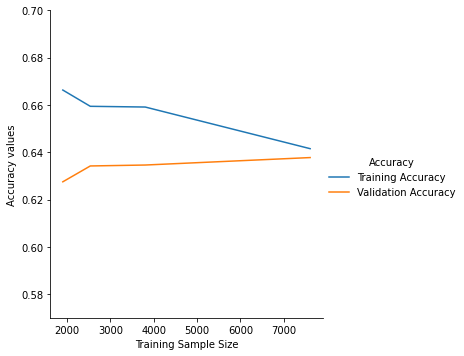

In [105]:
%matplotlib inline
import seaborn as sns
files.upload()
acc_df_GNB = pd.read_csv("bias_variance", index_col=False)
# acc_df_GNB = pd.read_csv("/Users/anushkahegde/Desktop/NEU/IE_7374_Machine_Learning/ml_project/Code/bias_variance")
acc_df_GNB_melt = acc_df_GNB.melt('Training Sample Size', var_name='Accuracy', value_name = 'Accuracy values')
g = sns.relplot(x="Training Sample Size", y="Accuracy values", hue="Accuracy", data=acc_df_GNB_melt, kind='line')
g.set(ylim=(0.57,0.7))
#g.set(xlim=(1000, 8000))

#### 4.4.3 - Summary
In this section, we implemeted the gaussian naive bayes and get an test accuracy on our data, which further deepen our understanding of gaussian naive bayes especially in high-dimensional features.

### 4.5 - Model Performance Comparison
We will measure the model performance by three metrics, like test accuracy, time consumption and space usage on previous models.

#### 4.5.1 - Test Accuracy 

In [ ]:
acc_list = [['Logistic Regression - Baseline', log_base_train_acc, log_base_valid_acc, log_base_test_acc],
             ['Logistic Regression - Tuned', log_train_acc, log_valid_acc, log_test_acc],
             ['Neural Network - Baseline', NN_base_train_acc, NN_base_valid_acc, NN_base_test_acc], 
             ['Neural Network - Tuned', NN_train_acc, NN_valid_acc, NN_test_acc],
             ['Hard SVM - Baseline', hard_svm_train_base_accuracy, hard_svm_valid_base_accuracy, hard_svm_test_base_accuracy], 
             ['Hard SVM - Tuned', hard_svm_train_accuracy, hard_svm_valid_accuracy, hard_svm_test_accuracy],
             ['Gaussian Naive Bayes', gnb_train_accuracy, gnb_valid_accuracy, gnb_test_accuracy]]
acc_df = pd.DataFrame(acc_list, columns = ['Models', 'Train Accuracy', 'Validation Accuracy', 'Test Accuracy'])
display(acc_df)

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Logistic Regression - Baseline,0.556242,0.566417,0.566023
1,Logistic Regression - Tuned,0.675821,0.682302,0.672054
2,Neural Network - Baseline,0.680815,0.675995,0.673630
3,Neural Network - Tuned,0.939290,0.735909,0.735120
4,Hard SVM - Baseline,0.686071,0.686244,0.672054
5,Hard SVM - Tuned,0.684888,0.687032,0.673630
6,Gaussian Naive Bayes,0.641524,0.637761,0.635790


#### 4.5.2 - Running time

In [ ]:

st = time.process_time()
logRegression()
end = time.process_time()
time_log = end - st

st = time.process_time()
neuronNetworks()
end = time.process_time()
time_neuron = end-st

st = time.process_time()
HardSVM()
end = time.process_time()
time_hard = end - st

st = time.process_time()
GNB()
end = time.process_time()
time_gnb = end - st

Mixture: Accuracy for best parameters, learning rate 0.001000, tolerance 0.001000, max iteration 1000, batchSize 128


100%|██████████| 1000/1000 [00:26<00:00, 37.62it/s]


0.6873850197109067

0.6795427670476941

0.6787544343713047

80/80 [==============================] - 1s 12ms/step - loss: 1.3220 - accuracy: 0.7241
Test accuracy: 0.724084 for Neural network with hidden layers, when dropout 0.300000, optimizers: Adam, epoch:50, batch_size:32, learing rate 0.001000, n_hidden:2048:
0.6736302719747733


In [ ]:
time_data = [['Logistic Regression', time_log], ['Neural Network', time_neuron], ['Hard SVM', time_hard], ['Gaussian Naive Bayes', time_gnb]]
time_df = pd.DataFrame(time_data, columns=['Model', 'Processing Time(s)'])
display(time_df)

,Model,Processing Time(s)
0,Logistic Regression,49.681866
1,Neural Network,883.636559
2,Hard SVM,135.805133
3,Gaussian Naive Bayes,339.217640


#### 4.5.3 - Space Usage

In [ ]:
# starting the monitoring
tracemalloc.start()
logRegression()
_, max_space_log = tracemalloc.get_traced_memory()
tracemalloc.stop()
max_space_log
 

tracemalloc.start()
neuronNetworks()
_, max_space_neuron = tracemalloc.get_traced_memory()
tracemalloc.stop()


tracemalloc.start()
HardSVM()
_, max_space_hard = tracemalloc.get_traced_memory()
tracemalloc.stop()

tracemalloc.start()
GNB()
_, max_space_gnb = tracemalloc.get_traced_memory()
tracemalloc.stop()

Mixture: Accuracy for best parameters, learning rate 0.001000, tolerance 0.001000, max iteration 1000, batchSize 128


100%|██████████| 1000/1000 [00:41<00:00, 24.19it/s]


0.6873850197109067

0.6795427670476941

0.6787544343713047

80/80 [==============================] - 1s 12ms/step - loss: 1.2543 - accuracy: 0.7288
Test accuracy: 0.728814 for Neural network with hidden layers, when dropout 0.300000, optimizers: Adam, epoch:50, batch_size:32, learing rate 0.001000, n_hidden:2048:
0.6736302719747733


In [ ]:
space_data = [['Logistic Regression', max_space_log], ['Neural Network', max_space_neuron], ['Hard SVM', max_space_hard], ['Gaussian Naive Bayes', max_space_gnb]]
space_df = pd.DataFrame(space_data, columns=['Model', 'Peak Memory(B)'])
print(space_df)

                  Model  Peak Memory(B)
0   Logistic Regression        13922189
1        Neural Network        13993211
2              Hard SVM         4451905
3  Gaussian Naive Bayes        13520765


In [ ]:
# !pip install memory_profiler
# import time
# from memory_profiler import memory_usage
# from time import sleep

# func_list = [logRegression(), neuronNetworks(), HardSVM()]
# time_dic = {}
# memory_dic = {}
# cnt = 0 
# for fun in func_list:
  
#   # time comsumption

#   time_dic[cnt] = end - st
  
#   # memory usage
#   # m = memory_usage(fun)
#   # memory_dic[str(fun)] = m

#   cnt += 1
